## Bike Sharing Assignment:
 - Linear Regression Assignment

In [363]:
# Filtering the Warnings
import warnings
warnings.filterwarnings('ignore')

In [364]:
## Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score



In [365]:
# Reading the data
bike=pd.read_csv("C:\\Users\\ANUSMITA\\Documents\\jupyter_python\\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Preparing the data set for further analysis:


In [366]:
bike.shape

(730, 16)

In [367]:
# Dropping the first column 'instant' from the dataset.
bike=bike.drop(["instant"],axis=1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [368]:
# Extracting the day from 'dteday' column and storing it in a new column 'day'

bike["day"]=bike.dteday.apply(lambda x:x.split("-")[0])
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [369]:
# Dropping the 'dteday' column

bike=bike.drop(['dteday'],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [370]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  day         730 non-null    object 
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [371]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualizing the numerical variables:

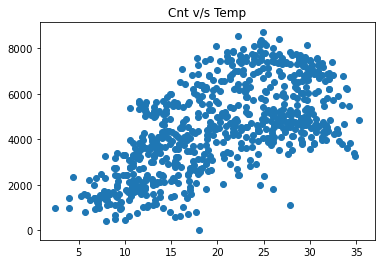

In [372]:
##cnt v/s temp
plt.scatter(data=bike,x='temp',y='cnt')
plt.title("Cnt v/s Temp")
plt.show()

#### Inference: We can see there is a linear relationship between the bike rented and the temperature. Warmer the temperature, more bikes get rented.

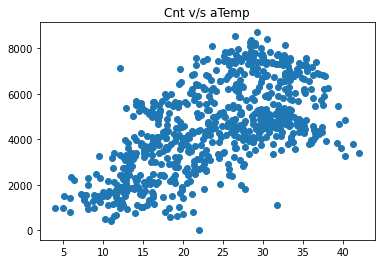

In [373]:
##cnt v/s atemp
plt.scatter(data=bike,x='atemp',y='cnt')
plt.title("Cnt v/s aTemp")
plt.show()

#### Inference: We can see both 'temp' and 'atemp' have similar distribution. Therefore, this indicates redundancy or multicollinearity.


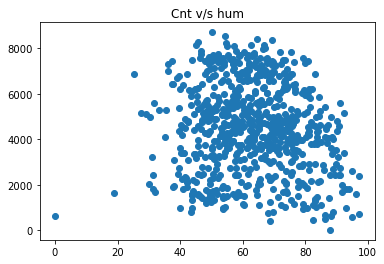

In [374]:
##cnt v/s hum
plt.scatter(data=bike,x='hum',y='cnt')
plt.title("Cnt v/s hum")
plt.show()

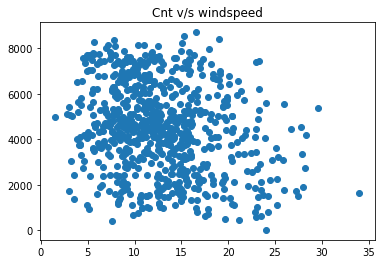

In [375]:
##cnt v/s windspeed
plt.scatter(data=bike,x='windspeed',y='cnt')
plt.title("Cnt v/s windspeed")
plt.show()

## Data Preparation:

In [376]:
bike.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
day            object
dtype: object

In [377]:
# Converting 'mnth' to categorical value:

def mnth_converted(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Octo",11:"Nov",12:"Dec"})

bike[["mnth"]]=bike[["mnth"]].apply(mnth_converted)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,1,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,1,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,1,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,1,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


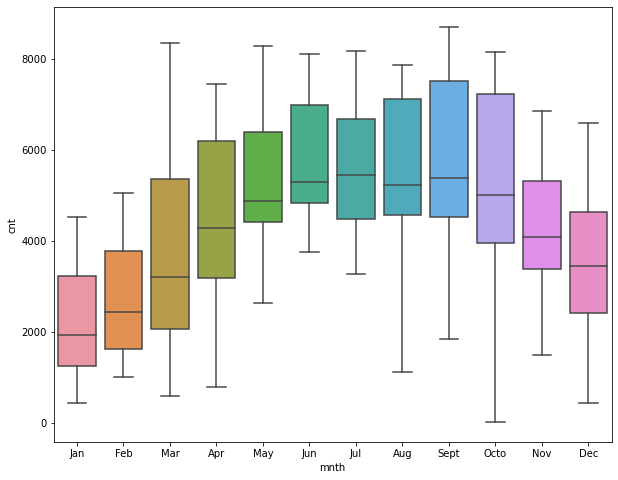

In [378]:
# to see the relationship between mnth and cnt
plt.figure(figsize=[10,8])
sns.boxplot(data=bike,x='mnth',y='cnt')
plt.show()

In [379]:
# Converting 'weathersit' to categorical value:

def weathersit_converted(x):
    return x.map({1:"Clear",2:"Mist",3:"Light Rain",4:"Heavy Rain"})

bike[["weathersit"]]=bike[["weathersit"]].apply(weathersit_converted)
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,Jan,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,1,0,Jan,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,1,0,Jan,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,1,0,Jan,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,1,0,Jan,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


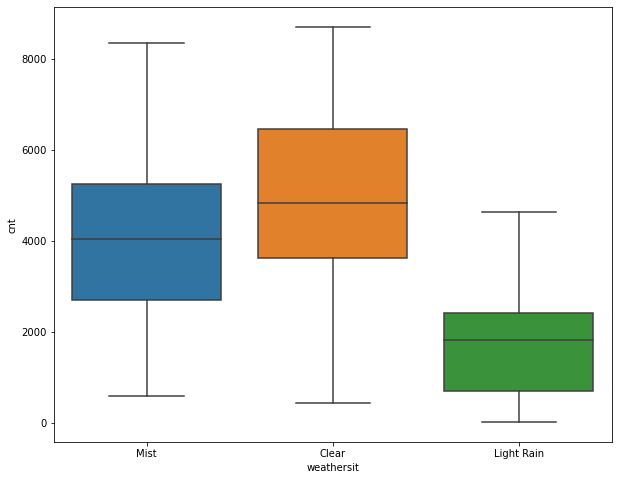

In [380]:
# to see the relationship between weathersit and cnt
plt.figure(figsize=[10,8])
sns.boxplot(data=bike,x='weathersit',y='cnt')
plt.show()

In [381]:
# Converting 'season' to categorical value:

def season_converted(x):
    return x.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})

bike[["season"]]=bike[["season"]].apply(season_converted)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,Spring,0,Jan,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,Spring,0,Jan,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,Spring,0,Jan,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,Spring,0,Jan,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,Spring,0,Jan,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


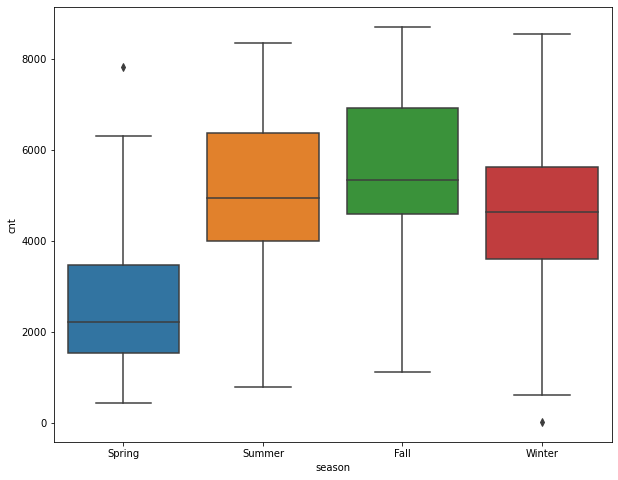

In [382]:
# to see the relationship between season and cnt
plt.figure(figsize=[10,8])
sns.boxplot(data=bike,x='season',y='cnt')
plt.show()

In [383]:
# Converting 'weekday' to categorical value:

def weekday_converted(x):
    return x.map({1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"})

bike[["weekday"]]=bike[["weekday"]].apply(weekday_converted)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,Spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,Spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


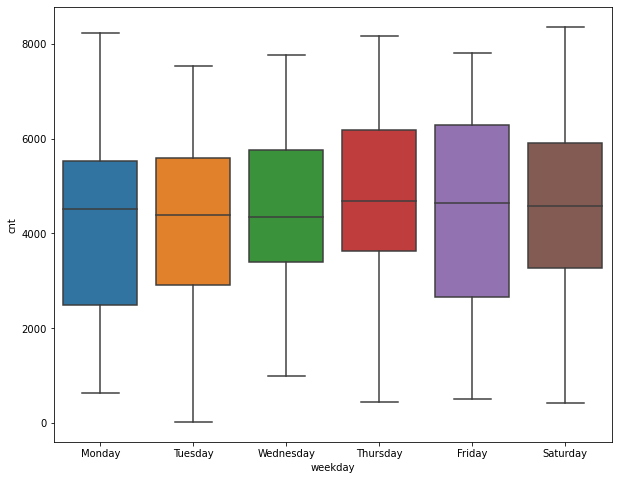

In [384]:
# to see the relationship between weekday and cnt
plt.figure(figsize=[10,8])
sns.boxplot(data=bike,x='weekday',y='cnt')
plt.show()

In [385]:
bike.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
day            object
dtype: object

In [386]:
# Converting 'holiday' to categorical value:

def holiday_converted(x):
    return x.map({0:"No Holiday",1:"Holiday"})

bike[["holiday"]]=bike[["holiday"]].apply(holiday_converted)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,Spring,0,Jan,No Holiday,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,Spring,0,Jan,No Holiday,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,Spring,0,Jan,No Holiday,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,Spring,0,Jan,No Holiday,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,Spring,0,Jan,No Holiday,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


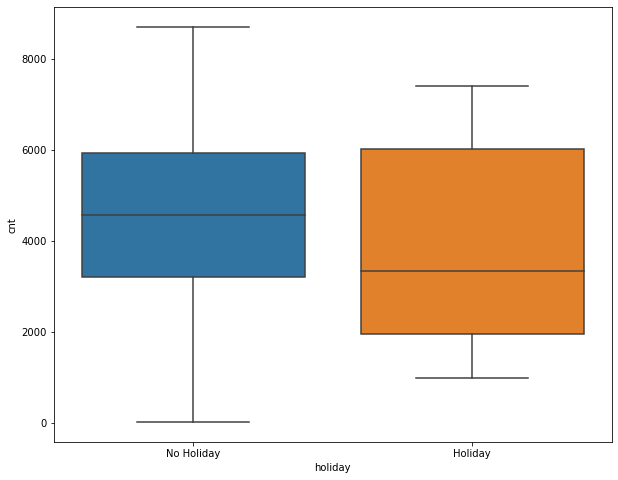

In [387]:
# to see the relationship between holiday and cnt
plt.figure(figsize=[10,8])
sns.boxplot(data=bike,x='holiday',y='cnt')
plt.show()

<Figure size 1440x1440 with 0 Axes>

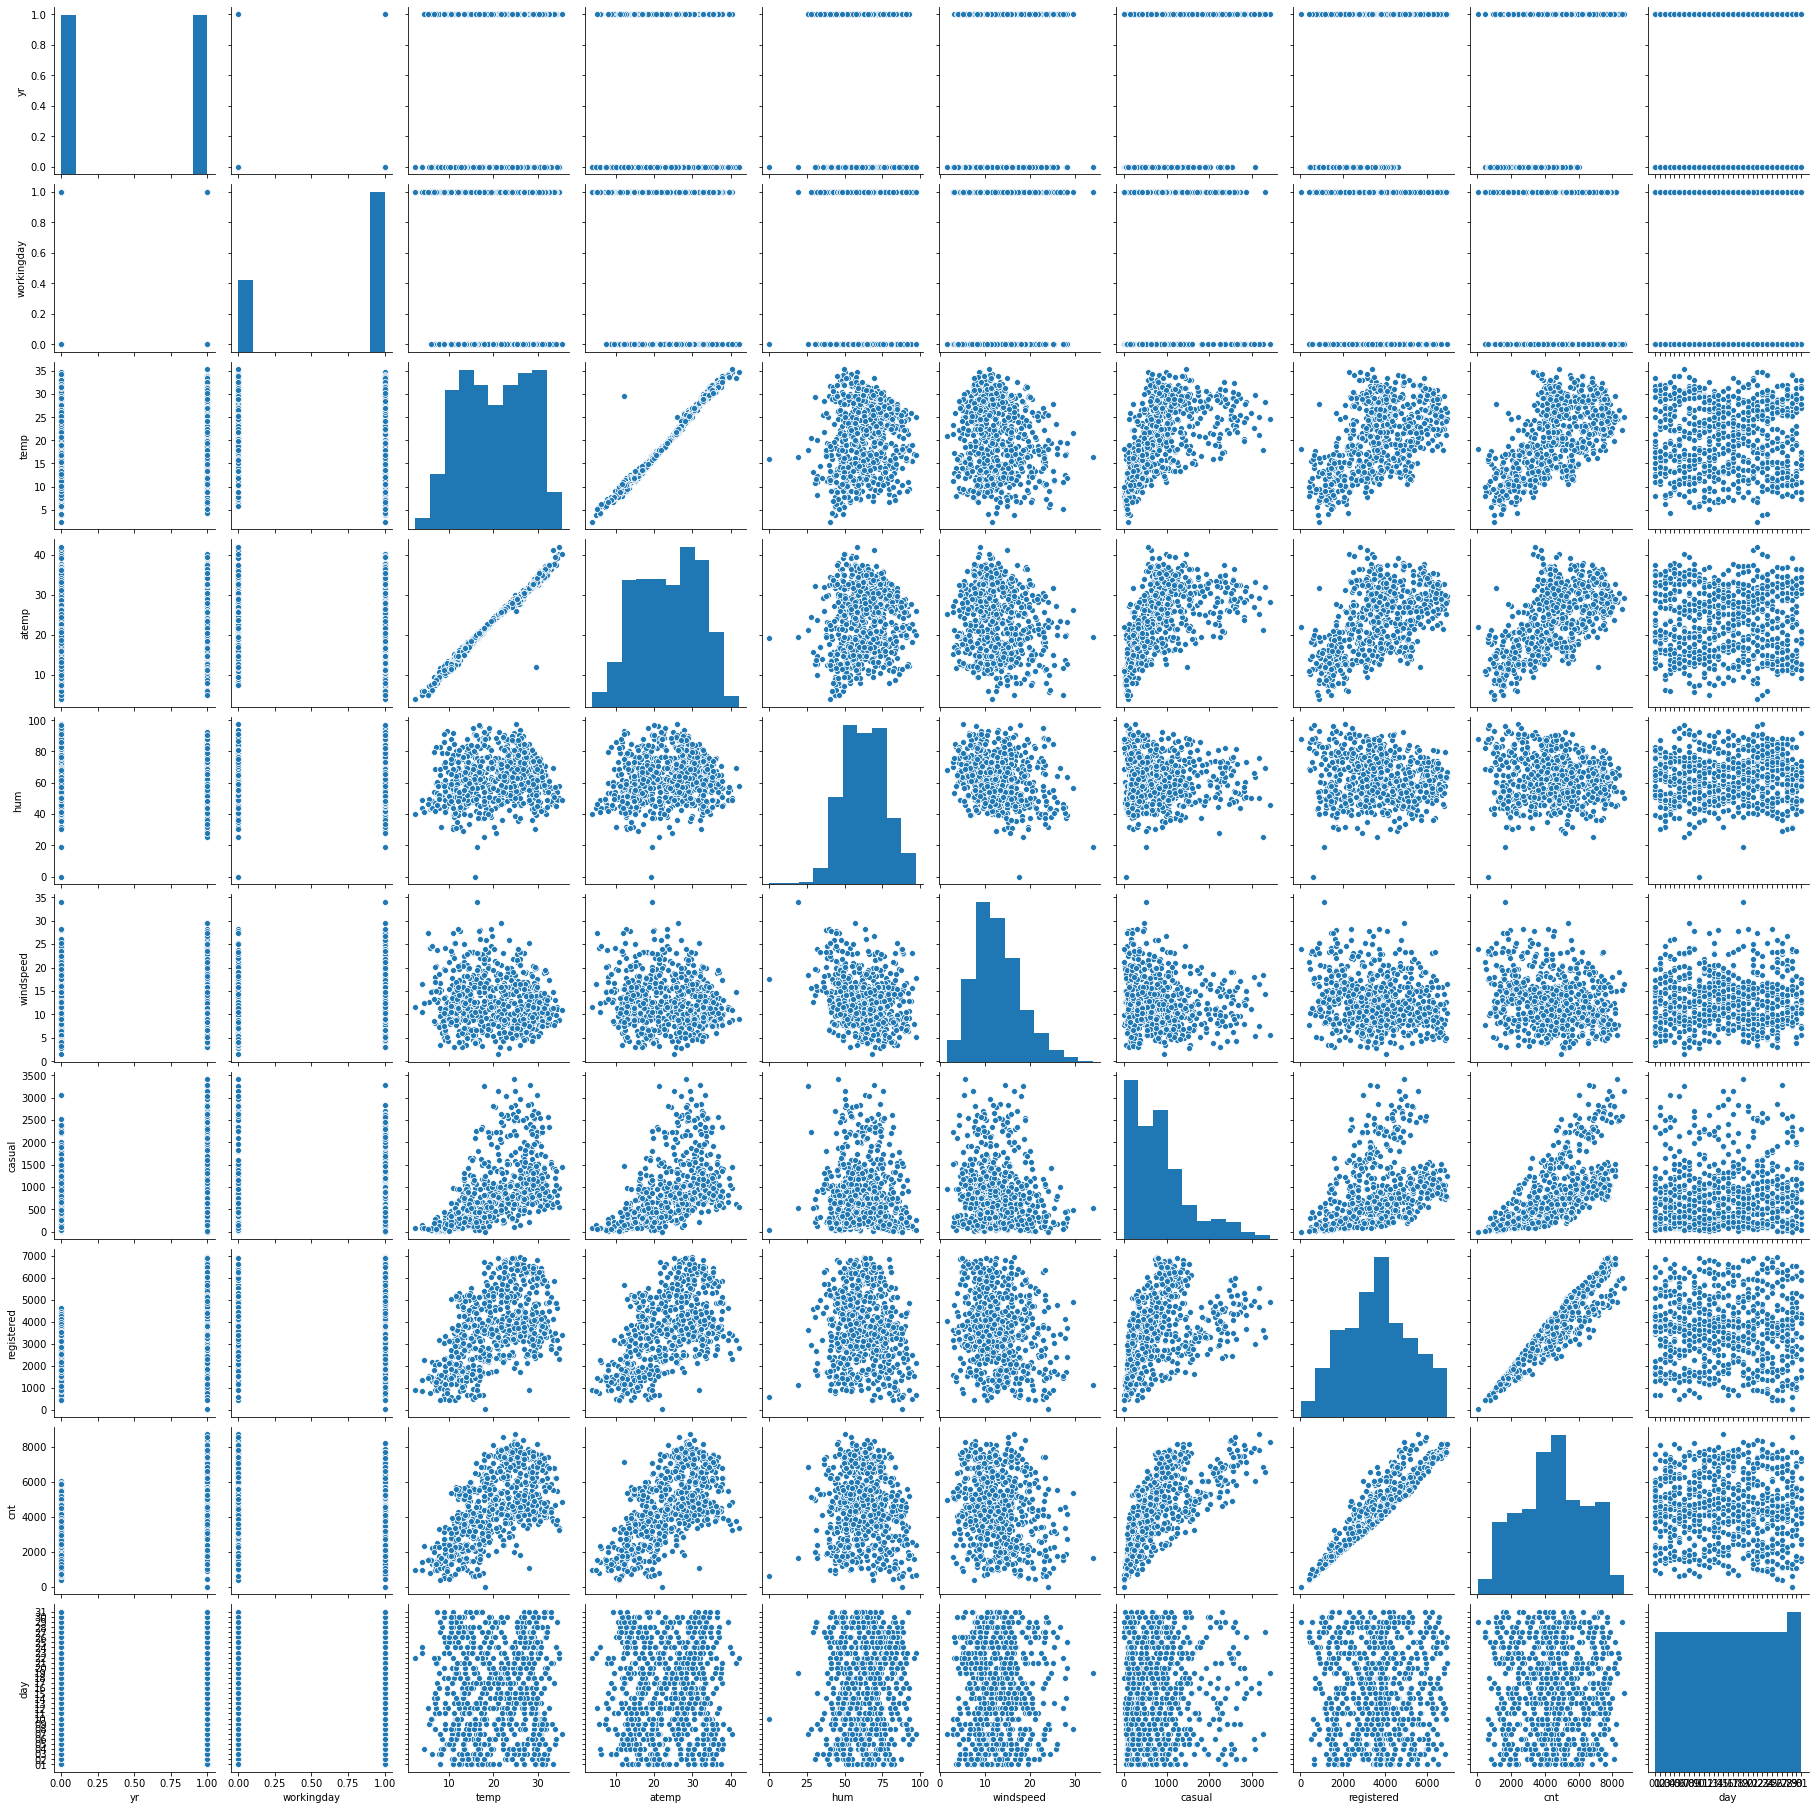

In [388]:
## Visualizing the Numeric variables
plt.figure(figsize=[20,20])
sns.pairplot(bike)
plt.show()

### Creating Dummy variables for season:

In [389]:
sea_dum=pd.get_dummies(bike["season"])
sea_dum.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [390]:
## There are four categorical levels, therefore we need (4-1)=3 dummies
## There we can drop the redundant one
sea_dum=pd.get_dummies(bike["season"],drop_first=True)
sea_dum.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [391]:
##merging the two data frames
bike=pd.concat([bike,sea_dum],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter
0,Spring,0,Jan,No Holiday,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01,1,0,0
1,Spring,0,Jan,No Holiday,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02,1,0,0
2,Spring,0,Jan,No Holiday,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03,1,0,0
3,Spring,0,Jan,No Holiday,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04,1,0,0
4,Spring,0,Jan,No Holiday,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05,1,0,0


In [392]:
bike=bike.drop('season',axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter
0,0,Jan,No Holiday,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01,1,0,0
1,0,Jan,No Holiday,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02,1,0,0
2,0,Jan,No Holiday,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03,1,0,0
3,0,Jan,No Holiday,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04,1,0,0
4,0,Jan,No Holiday,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05,1,0,0


#### Creating Dummy variables for weathersit:

In [393]:
weather_dum=pd.get_dummies(bike["weathersit"])
weather_dum.head()

,Clear,Light Rain,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [394]:
## There are three categorical levels, therefore we need (3-1)=2 dummies
## There we can drop the redundant one
weather_dum=pd.get_dummies(bike["weathersit"],drop_first=True)
weather_dum.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [395]:
##merging the two data frames
bike=pd.concat([bike,weather_dum],axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain,Mist
0,0,Jan,No Holiday,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01,1,0,0,0,1
1,0,Jan,No Holiday,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02,1,0,0,0,1
2,0,Jan,No Holiday,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03,1,0,0,0,0
3,0,Jan,No Holiday,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04,1,0,0,0,0
4,0,Jan,No Holiday,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05,1,0,0,0,0


In [396]:
bike=bike.drop('weathersit',axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain,Mist
0,0,Jan,No Holiday,Monday,1,14.110847,18.18125,80.5833,10.749882,331,654,985,01,1,0,0,0,1
1,0,Jan,No Holiday,Tuesday,1,14.902598,17.68695,69.6087,16.652113,131,670,801,02,1,0,0,0,1
2,0,Jan,No Holiday,Wednesday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03,1,0,0,0,0
3,0,Jan,No Holiday,Thursday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04,1,0,0,0,0
4,0,Jan,No Holiday,Friday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05,1,0,0,0,0


#### Creating Dummy variables for mnth:

In [397]:
mnth_dum=pd.get_dummies(bike["mnth"])
mnth_dum.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Octo,Sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [398]:
## There are 12 categorical levels, therefore we need (12-1)=11 dummies
## There we can drop the redundant one
mnth_dum=pd.get_dummies(bike["mnth"],drop_first=True)
mnth_dum.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Octo,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [399]:
##merging the two data frames
bike=pd.concat([bike,mnth_dum],axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Octo,Sept
0,0,Jan,No Holiday,Monday,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,No Holiday,Tuesday,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,No Holiday,Wednesday,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,No Holiday,Thursday,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,No Holiday,Friday,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [400]:
bike=bike.drop('mnth',axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Octo,Sept
0,0,No Holiday,Monday,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,No Holiday,Tuesday,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,No Holiday,Wednesday,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,No Holiday,Thursday,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,No Holiday,Friday,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


#### Creating Dummy variables for weekday:

In [401]:
weekday_dum=pd.get_dummies(bike["weekday"])
weekday_dum.head()

,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,1,0,0,0,0,0


In [402]:
## There are 6 categorical levels, therefore we need (6-1)=5 dummies
## There we can drop the redundant one
weekday_dum=pd.get_dummies(bike["weekday"],drop_first=True)
weekday_dum.head()

,Monday,Saturday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,0


In [403]:
##merging the two data frames
bike=pd.concat([bike,weekday_dum],axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Mar,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,No Holiday,Monday,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,1,0,0,0,0
1,0,No Holiday,Tuesday,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,1,0
2,0,No Holiday,Wednesday,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,1
3,0,No Holiday,Thursday,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,0,No Holiday,Friday,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [404]:
bike=bike.drop('weekday',axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Mar,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,No Holiday,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,1,0,0,0,0
1,0,No Holiday,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,No Holiday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,No Holiday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,No Holiday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


#### Creating Dummy variables for holiday:

In [405]:
holiday_dum=pd.get_dummies(bike["holiday"])
holiday_dum.head()

,Holiday,No Holiday
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [406]:
## There are 2 categorical levels, therefore we need (2-1)=1 dummy
## There we can drop the redundant one
holiday_dum=pd.get_dummies(bike["holiday"],drop_first=True)
holiday_dum.head()

,No Holiday
0,1
1,1
2,1
3,1
4,1


In [407]:
##merging the two data frames
bike=pd.concat([bike,holiday_dum],axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
0,0,No Holiday,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,1,0,0,0,0,1
1,0,No Holiday,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,1,0,1
2,0,No Holiday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,1,1
3,0,No Holiday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,1,0,0,1
4,0,No Holiday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


In [408]:
bike=bike.drop('holiday',axis=1)
bike.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,01,...,0,0,0,0,1,0,0,0,0,1
1,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,02,...,0,0,0,0,0,0,0,1,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03,...,0,0,0,0,0,0,0,0,1,1
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04,...,0,0,0,0,0,0,1,0,0,1
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05,...,0,0,0,0,0,0,0,0,0,1


In [409]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   casual      730 non-null    int64  
 7   registered  730 non-null    int64  
 8   cnt         730 non-null    int64  
 9   day         730 non-null    object 
 10  Spring      730 non-null    uint8  
 11  Summer      730 non-null    uint8  
 12  Winter      730 non-null    uint8  
 13  Light Rain  730 non-null    uint8  
 14  Mist        730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

In [410]:
bike.shape

(730, 32)

## Splitting the data into train and test sets:

In [411]:
bike_train,bike_test=train_test_split(bike,train_size=0.70,test_size=0.30,random_state=100)


In [412]:
bike_train.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
653,1,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534,16,...,0,0,1,0,0,0,0,0,1,1
576,1,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,31,...,0,0,0,0,0,0,0,0,1,1
426,1,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,03,...,0,0,0,0,0,0,0,0,0,1
728,1,1,10.489153,11.5850,48.3333,23.500518,364,1432,1796,30,...,0,0,0,0,1,0,0,0,0,1
482,1,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,28,...,0,0,0,0,0,0,0,0,0,1


In [413]:
bike_train.shape

(510, 32)

In [414]:
bike_test.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
184,0,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,04,...,0,0,0,0,0,0,0,0,1,0
535,1,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,20,...,0,0,0,0,0,0,1,0,0,1
299,0,0,19.270000,22.85230,81.2917,13.250121,240,2419,2659,27,...,0,0,1,0,0,1,0,0,0,1
221,0,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,10,...,0,0,0,0,0,0,0,0,0,1
152,0,0,29.315000,32.19710,30.5000,19.583229,736,4232,4968,02,...,0,0,0,0,0,1,0,0,0,1


In [415]:
bike_test.shape

(219, 32)

In [416]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   casual      730 non-null    int64  
 7   registered  730 non-null    int64  
 8   cnt         730 non-null    int64  
 9   day         730 non-null    object 
 10  Spring      730 non-null    uint8  
 11  Summer      730 non-null    uint8  
 12  Winter      730 non-null    uint8  
 13  Light Rain  730 non-null    uint8  
 14  Mist        730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

## Rescalling the features:

In [417]:
scaler=MinMaxScaler()

## scaling the numeric variables which are not binary
num_vars=["casual","registered","cnt","temp","atemp","windspeed","hum","day"]

## Fit on data
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0.500000,...,0,0,1,0,0,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1.000000,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0.066667,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0.966667,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0.900000,...,0,0,0,0,0,0,0,0,0,1


In [418]:
bike_train[num_vars].describe()

,casual,registered,cnt,temp,atemp,windspeed,hum,day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.254661,0.523944,0.513620,0.537262,0.512989,0.320768,0.650369,0.487124
std,0.206011,0.228175,0.224593,0.225844,0.212385,0.169797,0.145882,0.296648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094179,0.353487,0.356420,0.339853,0.332086,0.199179,0.538643,0.233333
50%,0.212740,0.525123,0.518638,0.540519,0.526811,0.296763,0.653714,0.500000
75%,0.327415,0.696073,0.684710,0.735215,0.688457,0.414447,0.754830,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### From here we can see that min is 0 for all and the max is 1 for all . Therefore, they are scalled

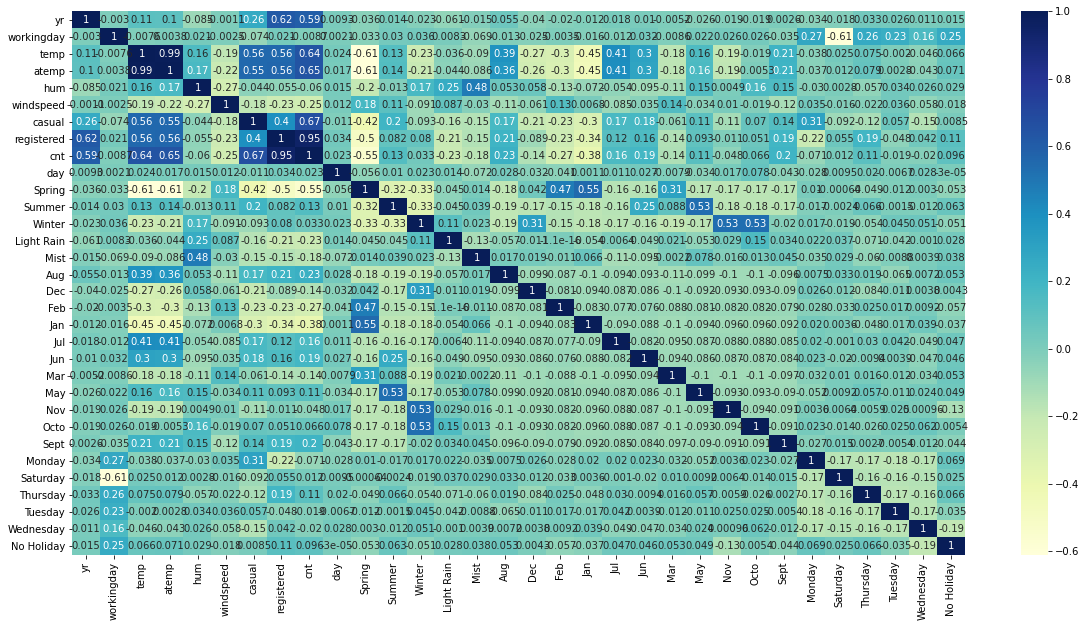

In [419]:
# Heatmap to see the correlation between the features
plt.figure(figsize=[20,10])
sns.heatmap(bike_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Training the model:

In [420]:
bike_train.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0.500000,...,0,0,1,0,0,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1.000000,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0.066667,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0.966667,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0.900000,...,0,0,0,0,0,0,0,0,0,1


In [421]:
# Declaring X_train and y_train
y_train=bike_train.pop('cnt')
X_train=bike_train

In [422]:
X_train.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,day,Spring,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.500000,0,...,0,0,1,0,0,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,1.000000,0,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.066667,1,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.966667,1,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.900000,0,...,0,0,0,0,0,0,0,0,0,1


In [423]:
# includes only the cnt(target) feature
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

 - We are creating the model by adding all the predictor variables first and dropping them one by one by checking.
 - We are using statsmodels for training the model
    - Therefore, we need to add constants fisrt.

In [424]:
## checking the list of all the columns
bike.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day', 'Spring', 'Summer', 'Winter', 'Light Rain',
       'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Octo', 'Sept', 'Monday', 'Saturday', 'Thursday', 'Tuesday',
       'Wednesday', 'No Holiday'],
      dtype='object')

In [425]:
## adding constants first
X_train_sm=sm.add_constant(X_train)



In [426]:
## build a model with all the variables

lr=sm.OLS(y_train.astype('float'),X_train_sm.astype('float'))
lr_model=lr.fit()
lr_model.params

const         9.436896e-16
yr           -1.743397e-16
workingday    1.665335e-16
temp          3.053113e-15
atemp        -3.108624e-15
hum           2.220446e-16
windspeed    -1.249001e-16
casual        3.774735e-01
registered    7.968247e-01
day           2.359224e-16
Spring        5.551115e-17
Summer       -4.232725e-16
Winter        8.326673e-17
Light Rain   -3.087808e-16
Mist          2.775558e-17
Aug          -4.302114e-16
Dec          -3.122502e-16
Feb          -1.561251e-16
Jan          -5.065393e-16
Jul          -4.371503e-16
Jun          -1.110223e-16
Mar          -2.289835e-16
May          -9.020562e-17
Nov          -5.516421e-16
Octo         -2.220446e-16
Sept         -5.273559e-16
Monday        1.760744e-16
Saturday      4.163336e-17
Thursday      2.775558e-17
Tuesday       1.700029e-16
Wednesday    -1.387779e-16
No Holiday    3.053113e-16
dtype: float64

In [427]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.323e+29
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:14:49   Log-Likelihood:                 16583.
No. Observations:                 510   AIC:                        -3.310e+04
Df Residuals:                     478   BIC:                        -3.297e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.437e-16   1.14e-15      0.831      0.407   -1.29e-15    3.18e-15
yr         -1.743e-16   2.92e-16     -0.598      0.550   -7.48e-16    3.99e-16
workingday  1.665e-16   3.45e-16      0.483      0.630   -5.11e-16    8.44e-16
temp        3.053e-15   3.07e-15      0.994      0.321   -2.98e-15    9.09e-15
atemp      -3.109e-15   2.95e-15     -1.052      0.293   -8.91e-15     2.7e-15
hum          2.22e-16   8.38e-16      0.265      0.791   -1.42e-15    1.87e-15
windspeed  -1.249e-16   5.92e-16     -0.211      0.833   -1.29e-15    1.04e-15
casual         0.3775   6.95e-16   5.43e+14      0.000       0.377       0.377
registered     0.7968   9.08e-16   8.78e+14      0.000       0.797       0.797
day         2.359e-16   2.88e-16      0.821      0.412   -3.29e-16    8.01e-16
Spring      5.551e-17   6.44e-16      0.086      0.931   -1.21e-15    1.32e-15
Summer     -4.233e-16   5.64e-16     -0.751      0.453   -1.53e-15    6.85e-16
Winter      8.327e-17   6.09e-16      0.137      0.891   -1.11e-15    1.28e-15
Light Rain -3.088e-16   6.15e-16     -0.502      0.616   -1.52e-15    8.99e-16
Mist        2.776e-17   2.31e-16      0.120      0.905   -4.27e-16    4.82e-16
Aug        -4.302e-16   7.27e-16     -0.592      0.554   -1.86e-15    9.98e-16
Dec        -3.123e-16   7.19e-16     -0.434      0.664   -1.73e-15     1.1e-15
Feb        -1.561e-16   7.06e-16     -0.221      0.825   -1.54e-15    1.23e-15
Jan        -5.065e-16    7.2e-16     -0.703      0.482   -1.92e-15    9.08e-16
Jul        -4.372e-16   7.54e-16     -0.580      0.562   -1.92e-15    1.04e-15
Jun         -1.11e-16   5.43e-16     -0.205      0.838   -1.18e-15    9.55e-16
Mar         -2.29e-16   5.25e-16     -0.436      0.663   -1.26e-15    8.02e-16
May        -9.021e-17   4.53e-16     -0.199      0.842   -9.79e-16    7.99e-16
Nov        -5.516e-16   7.79e-16     -0.708      0.479   -2.08e-15     9.8e-16
Octo        -2.22e-16    7.7e-16     -0.288      0.773   -1.73e-15    1.29e-15
Sept       -5.274e-16    6.9e-16     -0.765      0.445   -1.88e-15    8.28e-16
Monday      1.761e-16   3.74e-16      0.471      0.638   -5.58e-16    9.11e-16
Saturday    4.163e-17   3.46e-16      0.120      0.904   -6.39e-16    7.22e-16
Thursday    2.776e-17   3.16e-16      0.088      0.930   -5.93e-16    6.49e-16
Tuesday       1.7e-16   3.24e-16      0.525      0.600   -4.67e-16    8.07e-16
Wednesday  -1.388e-16   3.19e-16     -0.435      0.664   -7.66e-16    4.88e-16
No Holiday  3.053e-16   6.26e-16      0.487      0.626   -9.26e-16    1.54e-15
==============================================================================
Omnibus:                       17.856   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.650
Skew:                          -0.207   Prob(JB):                     8.13e-08
Ku

#### We can drop the variables depending upon two factors:
 - Significance(p-values)
 - VIF(Variance Inflation Factor)

In [428]:
## Creating a dataframe that stores the features along with their individual VIFs
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,451.21
3,atemp,384.73
30,No Holiday,42.59
4,hum,40.34
7,registered,37.02
11,Winter,12.93
9,Spring,12.48
1,workingday,11.99
10,Summer,8.44
6,casual,7.35


In [429]:
# The feature "registered" shows the total number of registered users who have made a booking on a given day.
# Therefore we can drop it to avoid multicollinearity.
X=X_train.drop(["registered"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,day,Spring,Summer,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.500000,0,0,...,0,0,1,0,0,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0.294422,1.000000,0,0,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.066667,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.966667,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.900000,0,1,...,0,0,0,0,0,0,0,0,0,1


In [430]:
# Creating a new model
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train.astype('float'),X_train_sm.astype('float'))
lr_model=lr.fit()
lr_model.params

const         0.193489
yr            0.201243
workingday    0.055840
temp          0.164226
atemp         0.114941
hum          -0.112380
windspeed    -0.107738
casual        0.383015
day           0.002414
Spring       -0.045658
Summer        0.008867
Winter        0.103753
Light Rain   -0.190745
Mist         -0.040293
Aug           0.027728
Dec          -0.021435
Feb          -0.018653
Jan          -0.042683
Jul          -0.012718
Jun           0.020669
Mar          -0.004717
May           0.030998
Nov          -0.042827
Octo         -0.020498
Sept          0.072082
Monday       -0.115950
Saturday      0.050909
Thursday      0.014206
Tuesday      -0.063240
Wednesday    -0.006345
No Holiday    0.065082
dtype: float64

In [431]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.71e-211
Time:                        00:14:49   Log-Likelihood:                 608.36
No. Observations:                 510   AIC:                            -1155.
Df Residuals:                     479   BIC:                            -1023.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1935      0.045      4.328      0.000       0.106       0.281
yr             0.2012      0.007     27.810      0.000       0.187       0.215
workingday     0.0558      0.014      4.106      0.000       0.029       0.083
temp           0.1642      0.123      1.335      0.182      -0.077       0.406
atemp          0.1149      0.118      0.971      0.332      -0.118       0.348
hum           -0.1124      0.033     -3.384      0.001      -0.178      -0.047
windspeed     -0.1077      0.023     -4.636      0.000      -0.153      -0.062
casual         0.3830      0.028     13.739      0.000       0.328       0.438
day            0.0024      0.012      0.209      0.834      -0.020       0.025
Spring        -0.0457      0.026     -1.774      0.077      -0.096       0.005
Summer         0.0089      0.023      0.392      0.695      -0.036       0.053
Winter         0.1038      0.024      4.327      0.000       0.057       0.151
Light Rain    -0.1907      0.023     -8.269      0.000      -0.236      -0.145
Mist          -0.0403      0.009     -4.432      0.000      -0.058      -0.022
Aug            0.0277      0.029      0.952      0.342      -0.030       0.085
Dec           -0.0214      0.029     -0.743      0.458      -0.078       0.035
Feb           -0.0187      0.028     -0.659      0.510      -0.074       0.037
Jan           -0.0427      0.029     -1.481      0.139      -0.099       0.014
Jul           -0.0127      0.030     -0.421      0.674      -0.072       0.047
Jun            0.0207      0.022      0.950      0.342      -0.022       0.063
Mar           -0.0047      0.021     -0.224      0.823      -0.046       0.037
May            0.0310      0.018      1.713      0.087      -0.005       0.067
Nov           -0.0428      0.031     -1.373      0.170      -0.104       0.018
Octo          -0.0205      0.031     -0.664      0.507      -0.081       0.040
Sept           0.0721      0.027      2.624      0.009       0.018       0.126
Monday        -0.1160      0.014     -8.267      0.000      -0.144      -0.088
Saturday       0.0509      0.014      3.716      0.000       0.024       0.078
Thursday       0.0142      0.013      1.122      0.262      -0.011       0.039
Tuesday       -0.0632      0.013     -4.992      0.000      -0.088      -0.038
Wednesday     -0.0063      0.013     -0.496      0.620      -0.031       0.019
No Holiday     0.0651      0.025      2.609      0.009       0.016       0.114
==============================================================================
Omnibus:                       99.515   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.678
Skew:                          -0.997   Prob(JB):                     9.01e-53
Kurtosis:                       5.703   Cond. No.                         109.
==

In [432]:
# Calculating the VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,447.76
3,atemp,384.07
29,No Holiday,40.09
4,hum,39.94
8,Spring,12.48
10,Winter,12.24
1,workingday,11.65
9,Summer,8.29
6,casual,7.34
22,Octo,6.69


In [433]:
# The feature "casual" the number casual users who have made a rental.
# Therefore dropping it to avoid multicollinearity.
X=X.drop(["casual"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,day,Spring,Summer,Winter,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0.500000,0,0,1,...,0,0,1,0,0,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,0.066667,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,0.966667,1,0,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.900000,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [434]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.250979
yr            0.231266
workingday   -0.012025
temp          0.404410
atemp         0.043190
hum          -0.156056
windspeed    -0.181562
day          -0.003626
Spring       -0.044256
Summer        0.041930
Winter        0.109310
Light Rain   -0.250859
Mist         -0.059535
Aug           0.022577
Dec          -0.044658
Feb          -0.036480
Jan          -0.062653
Jul          -0.034492
Jun           0.001849
Mar           0.000996
May           0.024122
Nov          -0.041701
Octo          0.007210
Sept          0.086785
Monday       -0.023724
Saturday     -0.007083
Thursday      0.004882
Tuesday      -0.025059
Wednesday    -0.009422
No Holiday    0.094217
dtype: float64

In [435]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.39
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.05e-178
Time:                        00:14:50   Log-Likelihood:                 523.64
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     480   BIC:                            -860.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.052      4.781      0.000       0.148       0.354
yr             0.2313      0.008     28.423      0.000       0.215       0.247
workingday    -0.0120      0.015     -0.805      0.421      -0.041       0.017
temp           0.4044      0.144      2.816      0.005       0.122       0.687
atemp          0.0432      0.140      0.310      0.757      -0.231       0.317
hum           -0.1561      0.039     -4.002      0.000      -0.233      -0.079
windspeed     -0.1816      0.027     -6.808      0.000      -0.234      -0.129
day           -0.0036      0.014     -0.267      0.790      -0.030       0.023
Spring        -0.0443      0.030     -1.457      0.146      -0.104       0.015
Summer         0.0419      0.027      1.581      0.115      -0.010       0.094
Winter         0.1093      0.028      3.865      0.000       0.054       0.165
Light Rain    -0.2509      0.027     -9.391      0.000      -0.303      -0.198
Mist          -0.0595      0.011     -5.619      0.000      -0.080      -0.039
Aug            0.0226      0.034      0.657      0.511      -0.045       0.090
Dec           -0.0447      0.034     -1.315      0.189      -0.111       0.022
Feb           -0.0365      0.033     -1.094      0.274      -0.102       0.029
Jan           -0.0627      0.034     -1.846      0.066      -0.129       0.004
Jul           -0.0345      0.036     -0.969      0.333      -0.104       0.035
Jun            0.0018      0.026      0.072      0.942      -0.048       0.052
Mar            0.0010      0.025      0.040      0.968      -0.048       0.050
May            0.0241      0.021      1.131      0.259      -0.018       0.066
Nov           -0.0417      0.037     -1.133      0.258      -0.114       0.031
Octo           0.0072      0.036      0.198      0.843      -0.064       0.079
Sept           0.0868      0.032      2.681      0.008       0.023       0.150
Monday        -0.0237      0.015     -1.633      0.103      -0.052       0.005
Saturday      -0.0071      0.015     -0.461      0.645      -0.037       0.023
Thursday       0.0049      0.015      0.327      0.744      -0.024       0.034
Tuesday       -0.0251      0.015     -1.719      0.086      -0.054       0.004
Wednesday     -0.0094      0.015     -0.624      0.533      -0.039       0.020
No Holiday     0.0942      0.029      3.214      0.001       0.037       0.152
==============================================================================
Omnibus:                       78.442   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.154
Skew:                          -0.770   Prob(JB):                     4.66e-45
Kurtosis:                       5.690   Cond. No.                         107.
==============================================================================

W

In [436]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,436.65
3,atemp,383.28
4,hum,39.73
28,No Holiday,39.14
7,Spring,12.46
9,Winter,12.23
1,workingday,10.03
8,Summer,8.02
21,Octo,6.63
12,Aug,6.48


In [437]:
# The feature 'day' has high p-value and low VIF, therefore dropping it
X=X.drop(["day"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [438]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.249669
yr            0.231234
workingday   -0.012013
temp          0.402990
atemp         0.044998
hum          -0.156759
windspeed    -0.181751
Spring       -0.043808
Summer        0.041838
Winter        0.109821
Light Rain   -0.250592
Mist         -0.059262
Aug           0.022352
Dec          -0.045101
Feb          -0.036821
Jan          -0.063160
Jul          -0.034699
Jun           0.001647
Mar           0.000675
May           0.024219
Nov          -0.042351
Octo          0.006333
Sept          0.086697
Monday       -0.023648
Saturday     -0.007116
Thursday      0.004825
Tuesday      -0.025047
Wednesday    -0.009509
No Holiday    0.094134
dtype: float64

In [439]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.94
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.23e-179
Time:                        00:14:51   Log-Likelihood:                 523.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     481   BIC:                            -866.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2497      0.052      4.782      0.000       0.147       0.352
yr             0.2312      0.008     28.450      0.000       0.215       0.247
workingday    -0.0120      0.015     -0.805      0.421      -0.041       0.017
temp           0.4030      0.143      2.811      0.005       0.121       0.685
atemp          0.0450      0.139      0.323      0.747      -0.229       0.319
hum           -0.1568      0.039     -4.033      0.000      -0.233      -0.080
windspeed     -0.1818      0.027     -6.824      0.000      -0.234      -0.129
Spring        -0.0438      0.030     -1.446      0.149      -0.103       0.016
Summer         0.0418      0.026      1.579      0.115      -0.010       0.094
Winter         0.1098      0.028      3.896      0.000       0.054       0.165
Light Rain    -0.2506      0.027     -9.396      0.000      -0.303      -0.198
Mist          -0.0593      0.011     -5.625      0.000      -0.080      -0.039
Aug            0.0224      0.034      0.651      0.515      -0.045       0.090
Dec           -0.0451      0.034     -1.331      0.184      -0.112       0.021
Feb           -0.0368      0.033     -1.107      0.269      -0.102       0.029
Jan           -0.0632      0.034     -1.866      0.063      -0.130       0.003
Jul           -0.0347      0.036     -0.976      0.330      -0.105       0.035
Jun            0.0016      0.026      0.064      0.949      -0.049       0.052
Mar            0.0007      0.025      0.027      0.978      -0.048       0.049
May            0.0242      0.021      1.136      0.256      -0.018       0.066
Nov           -0.0424      0.037     -1.155      0.249      -0.114       0.030
Octo           0.0063      0.036      0.175      0.861      -0.065       0.077
Sept           0.0867      0.032      2.681      0.008       0.023       0.150
Monday        -0.0236      0.015     -1.630      0.104      -0.052       0.005
Saturday      -0.0071      0.015     -0.463      0.643      -0.037       0.023
Thursday       0.0048      0.015      0.324      0.746      -0.024       0.034
Tuesday       -0.0250      0.015     -1.720      0.086      -0.054       0.004
Wednesday     -0.0095      0.015     -0.631      0.529      -0.039       0.020
No Holiday     0.0941      0.029      3.214      0.001       0.037       0.152
==============================================================================
Omnibus:                       79.379   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.184
Skew:                          -0.778   Prob(JB):                     1.02e-45
Kurtosis:                       5.708   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [440]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,435.45
3,atemp,382.31
4,hum,39.35
27,No Holiday,38.95
6,Spring,12.45
8,Winter,12.20
1,workingday,10.03
7,Summer,7.98
20,Octo,6.53
11,Aug,6.46


In [441]:
# The feature 'Thursday' has high p-value and low VIF, therefore dropping it
X=X.drop(["Thursday"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,Mar,May,Nov,Octo,Sept,Monday,Saturday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [442]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.251622
yr            0.231318
workingday   -0.009668
temp          0.403091
atemp         0.045140
hum          -0.157140
windspeed    -0.181922
Spring       -0.043967
Summer        0.042072
Winter        0.109883
Light Rain   -0.251388
Mist         -0.059354
Aug           0.022365
Dec          -0.045318
Feb          -0.036456
Jan          -0.063038
Jul          -0.034456
Jun           0.001248
Mar           0.000733
May           0.024195
Nov          -0.042478
Octo          0.006483
Sept          0.086708
Monday       -0.025984
Saturday     -0.007141
Tuesday      -0.027410
Wednesday    -0.011823
No Holiday    0.092336
dtype: float64

In [443]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.41e-180
Time:                        00:14:52   Log-Likelihood:                 523.55
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     482   BIC:                            -872.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2516      0.052      4.856      0.000       0.150       0.353
yr             0.2313      0.008     28.501      0.000       0.215       0.247
workingday    -0.0097      0.013     -0.741      0.459      -0.035       0.016
temp           0.4031      0.143      2.814      0.005       0.122       0.685
atemp          0.0451      0.139      0.325      0.746      -0.228       0.318
hum           -0.1571      0.039     -4.049      0.000      -0.233      -0.081
windspeed     -0.1819      0.027     -6.838      0.000      -0.234      -0.130
Spring        -0.0440      0.030     -1.453      0.147      -0.103       0.015
Summer         0.0421      0.026      1.590      0.112      -0.010       0.094
Winter         0.1099      0.028      3.902      0.000       0.055       0.165
Light Rain    -0.2514      0.027     -9.475      0.000      -0.304      -0.199
Mist          -0.0594      0.011     -5.641      0.000      -0.080      -0.039
Aug            0.0224      0.034      0.652      0.515      -0.045       0.090
Dec           -0.0453      0.034     -1.339      0.181      -0.112       0.021
Feb           -0.0365      0.033     -1.097      0.273      -0.102       0.029
Jan           -0.0630      0.034     -1.864      0.063      -0.129       0.003
Jul           -0.0345      0.036     -0.970      0.333      -0.104       0.035
Jun            0.0012      0.026      0.049      0.961      -0.049       0.051
Mar            0.0007      0.025      0.030      0.976      -0.048       0.049
May            0.0242      0.021      1.136      0.256      -0.018       0.066
Nov           -0.0425      0.037     -1.159      0.247      -0.114       0.030
Octo           0.0065      0.036      0.180      0.858      -0.064       0.077
Sept           0.0867      0.032      2.684      0.008       0.023       0.150
Monday        -0.0260      0.013     -2.066      0.039      -0.051      -0.001
Saturday      -0.0071      0.015     -0.465      0.642      -0.037       0.023
Tuesday       -0.0274      0.013     -2.177      0.030      -0.052      -0.003
Wednesday     -0.0118      0.013     -0.891      0.373      -0.038       0.014
No Holiday     0.0923      0.029      3.214      0.001       0.036       0.149
==============================================================================
Omnibus:                       79.724   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.493
Skew:                          -0.780   Prob(JB):                     5.32e-46
Kurtosis:                       5.716   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [444]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,435.26
3,atemp,382.31
4,hum,39.35
26,No Holiday,38.04
6,Spring,12.44
8,Winter,12.19
7,Summer,7.89
1,workingday,7.74
20,Octo,6.51
11,Aug,6.45


In [445]:
# The feature 'Saturday' has high p-value and low VIF, therefore dropping it
X=X.drop(["Saturday"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,Jun,Mar,May,Nov,Octo,Sept,Monday,Tuesday,Wednesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [446]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.251412
yr            0.231437
workingday   -0.006218
temp          0.398417
atemp         0.049545
hum          -0.157172
windspeed    -0.181435
Spring       -0.044498
Summer        0.041726
Winter        0.109732
Light Rain   -0.251839
Mist         -0.059236
Aug           0.022270
Dec          -0.045161
Feb          -0.036084
Jan          -0.062917
Jul          -0.034280
Jun           0.001493
Mar           0.000929
May           0.024249
Nov          -0.043013
Octo          0.006401
Sept          0.086644
Monday       -0.025963
Tuesday      -0.027397
Wednesday    -0.011747
No Holiday    0.089318
dtype: float64

In [447]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.79e-181
Time:                        00:14:53   Log-Likelihood:                 523.44
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     483   BIC:                            -878.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2514      0.052      4.856      0.000       0.150       0.353
yr             0.2314      0.008     28.553      0.000       0.216       0.247
workingday    -0.0062      0.011     -0.580      0.562      -0.027       0.015
temp           0.3984      0.143      2.791      0.005       0.118       0.679
atemp          0.0495      0.139      0.357      0.721      -0.223       0.322
hum           -0.1572      0.039     -4.053      0.000      -0.233      -0.081
windspeed     -0.1814      0.027     -6.830      0.000      -0.234      -0.129
Spring        -0.0445      0.030     -1.473      0.141      -0.104       0.015
Summer         0.0417      0.026      1.579      0.115      -0.010       0.094
Winter         0.1097      0.028      3.900      0.000       0.054       0.165
Light Rain    -0.2518      0.026     -9.506      0.000      -0.304      -0.200
Mist          -0.0592      0.011     -5.636      0.000      -0.080      -0.039
Aug            0.0223      0.034      0.650      0.516      -0.045       0.090
Dec           -0.0452      0.034     -1.336      0.182      -0.112       0.021
Feb           -0.0361      0.033     -1.087      0.277      -0.101       0.029
Jan           -0.0629      0.034     -1.862      0.063      -0.129       0.003
Jul           -0.0343      0.035     -0.966      0.335      -0.104       0.035
Jun            0.0015      0.025      0.059      0.953      -0.049       0.052
Mar            0.0009      0.025      0.038      0.970      -0.048       0.050
May            0.0242      0.021      1.140      0.255      -0.018       0.066
Nov           -0.0430      0.037     -1.175      0.240      -0.115       0.029
Octo           0.0064      0.036      0.177      0.859      -0.064       0.077
Sept           0.0866      0.032      2.684      0.008       0.023       0.150
Monday        -0.0260      0.013     -2.066      0.039      -0.051      -0.001
Tuesday       -0.0274      0.013     -2.177      0.030      -0.052      -0.003
Wednesday     -0.0117      0.013     -0.886      0.376      -0.038       0.014
No Holiday     0.0893      0.028      3.194      0.001       0.034       0.144
==============================================================================
Omnibus:                       78.673   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.445
Skew:                          -0.771   Prob(JB):                     2.44e-45
Kurtosis:                       5.700   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [448]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,432.97
3,atemp,380.53
4,hum,39.35
25,No Holiday,35.31
6,Spring,12.42
8,Winter,12.18
7,Summer,7.88
20,Octo,6.51
11,Aug,6.45
19,Nov,6.08


In [449]:
# The feature 'Wednesday' has high p-value and low VIF, therefore dropping it
X=X.drop(["Wednesday"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,Jul,Jun,Mar,May,Nov,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [450]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.243133
yr            0.231260
workingday   -0.009763
temp          0.400209
atemp         0.049816
hum          -0.157530
windspeed    -0.180624
Spring       -0.044608
Summer        0.041593
Winter        0.108963
Light Rain   -0.251634
Mist         -0.059313
Aug           0.021571
Dec          -0.044536
Feb          -0.035557
Jan          -0.062724
Jul          -0.034900
Jun           0.001487
Mar           0.001448
May           0.023940
Nov          -0.041610
Octo          0.006182
Sept          0.086731
Monday       -0.022386
Tuesday      -0.023703
No Holiday    0.096710
dtype: float64

In [451]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.05e-182
Time:                        00:14:53   Log-Likelihood:                 523.02
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     484   BIC:                            -883.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2431      0.051      4.776      0.000       0.143       0.343
yr             0.2313      0.008     28.547      0.000       0.215       0.247
workingday    -0.0098      0.010     -0.981      0.327      -0.029       0.010
temp           0.4002      0.143      2.804      0.005       0.120       0.681
atemp          0.0498      0.139      0.359      0.719      -0.223       0.322
hum           -0.1575      0.039     -4.063      0.000      -0.234      -0.081
windspeed     -0.1806      0.027     -6.805      0.000      -0.233      -0.128
Spring        -0.0446      0.030     -1.477      0.140      -0.104       0.015
Summer         0.0416      0.026      1.574      0.116      -0.010       0.094
Winter         0.1090      0.028      3.875      0.000       0.054       0.164
Light Rain    -0.2516      0.026     -9.501      0.000      -0.304      -0.200
Mist          -0.0593      0.011     -5.645      0.000      -0.080      -0.039
Aug            0.0216      0.034      0.630      0.529      -0.046       0.089
Dec           -0.0445      0.034     -1.318      0.188      -0.111       0.022
Feb           -0.0356      0.033     -1.072      0.284      -0.101       0.030
Jan           -0.0627      0.034     -1.856      0.064      -0.129       0.004
Jul           -0.0349      0.035     -0.984      0.326      -0.105       0.035
Jun            0.0015      0.025      0.058      0.953      -0.049       0.052
Mar            0.0014      0.025      0.059      0.953      -0.047       0.050
May            0.0239      0.021      1.126      0.261      -0.018       0.066
Nov           -0.0416      0.037     -1.138      0.256      -0.113       0.030
Octo           0.0062      0.036      0.171      0.864      -0.065       0.077
Sept           0.0867      0.032      2.687      0.007       0.023       0.150
Monday        -0.0224      0.012     -1.882      0.060      -0.046       0.001
Tuesday       -0.0237      0.012     -1.997      0.046      -0.047      -0.000
No Holiday     0.0967      0.027      3.624      0.000       0.044       0.149
==============================================================================
Omnibus:                       78.499   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.487
Skew:                          -0.767   Prob(JB):                     1.45e-45
Kurtosis:                       5.714   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [452]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,432.87
3,atemp,380.52
4,hum,39.18
24,No Holiday,33.23
6,Spring,12.35
8,Winter,12.13
7,Summer,7.76
20,Octo,6.48
11,Aug,6.40
19,Nov,6.07


In [453]:
# The feature 'Mar' has high p-value and low VIF, therefore dropping it
X=X.drop(["Mar"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,Jan,Jul,Jun,May,Nov,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [454]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.244040
yr            0.231257
workingday   -0.009760
temp          0.399935
atemp         0.049632
hum          -0.157349
windspeed    -0.180702
Spring       -0.044040
Summer        0.041298
Winter        0.109270
Light Rain   -0.251627
Mist         -0.059322
Aug           0.020906
Dec          -0.045789
Feb          -0.036990
Jan          -0.064201
Jul          -0.035526
Jun           0.001016
May           0.023500
Nov          -0.042748
Octo          0.005086
Sept          0.085944
Monday       -0.022426
Tuesday      -0.023726
No Holiday    0.096735
dtype: float64

In [455]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          7.44e-183
Time:                        00:14:54   Log-Likelihood:                 523.02
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     485   BIC:                            -890.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2440      0.048      5.037      0.000       0.149       0.339
yr             0.2313      0.008     28.576      0.000       0.215       0.247
workingday    -0.0098      0.010     -0.982      0.327      -0.029       0.010
temp           0.3999      0.142      2.807      0.005       0.120       0.680
atemp          0.0496      0.138      0.358      0.720      -0.222       0.322
hum           -0.1573      0.039     -4.076      0.000      -0.233      -0.081
windspeed     -0.1807      0.026     -6.824      0.000      -0.233      -0.129
Spring        -0.0440      0.029     -1.541      0.124      -0.100       0.012
Summer         0.0413      0.026      1.594      0.112      -0.010       0.092
Winter         0.1093      0.028      3.959      0.000       0.055       0.163
Light Rain    -0.2516      0.026     -9.511      0.000      -0.304      -0.200
Mist          -0.0593      0.010     -5.652      0.000      -0.080      -0.039
Aug            0.0209      0.032      0.648      0.517      -0.043       0.084
Dec           -0.0458      0.026     -1.751      0.080      -0.097       0.006
Feb           -0.0370      0.022     -1.652      0.099      -0.081       0.007
Jan           -0.0642      0.022     -2.857      0.004      -0.108      -0.020
Jul           -0.0355      0.034     -1.051      0.294      -0.102       0.031
Jun            0.0010      0.024      0.042      0.966      -0.046       0.048
May            0.0235      0.020      1.182      0.238      -0.016       0.063
Nov           -0.0427      0.031     -1.382      0.167      -0.104       0.018
Octo           0.0051      0.031      0.165      0.869      -0.055       0.066
Sept           0.0859      0.029      2.932      0.004       0.028       0.144
Monday        -0.0224      0.012     -1.890      0.059      -0.046       0.001
Tuesday       -0.0237      0.012     -2.002      0.046      -0.047      -0.000
No Holiday     0.0967      0.027      3.629      0.000       0.044       0.149
==============================================================================
Omnibus:                       78.459   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.643
Skew:                          -0.766   Prob(JB):                     1.34e-45
Kurtosis:                       5.716   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [456]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,432.74
3,atemp,380.17
4,hum,37.82
23,No Holiday,31.81
8,Winter,11.27
6,Spring,9.41
7,Summer,7.76
11,Aug,5.99
5,windspeed,5.52
15,Jul,5.31


In [457]:
# The feature 'Jun' has high p-value and low VIF, therefore dropping it
X=X.drop(["Jun"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,Feb,Jan,Jul,May,Nov,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [458]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.244136
yr            0.231221
workingday   -0.009758
temp          0.401728
atemp         0.048840
hum          -0.157512
windspeed    -0.180838
Spring       -0.044411
Summer        0.041027
Winter        0.109064
Light Rain   -0.251621
Mist         -0.059306
Aug           0.020052
Dec          -0.045875
Feb          -0.036913
Jan          -0.064055
Jul          -0.036437
May           0.023104
Nov          -0.042941
Octo          0.004764
Sept          0.085270
Monday       -0.022386
Tuesday      -0.023714
No Holiday    0.096792
dtype: float64

In [459]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.72e-184
Time:                        00:14:55   Log-Likelihood:                 523.02
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     486   BIC:                            -896.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2441      0.048      5.050      0.000       0.149       0.339
yr             0.2312      0.008     28.763      0.000       0.215       0.247
workingday    -0.0098      0.010     -0.982      0.326      -0.029       0.010
temp           0.4017      0.136      2.958      0.003       0.135       0.669
atemp          0.0488      0.137      0.356      0.722      -0.220       0.318
hum           -0.1575      0.038     -4.105      0.000      -0.233      -0.082
windspeed     -0.1808      0.026     -6.887      0.000      -0.232      -0.129
Spring        -0.0444      0.027     -1.636      0.102      -0.098       0.009
Summer         0.0410      0.025      1.637      0.102      -0.008       0.090
Winter         0.1091      0.027      4.019      0.000       0.056       0.162
Light Rain    -0.2516      0.026     -9.520      0.000      -0.304      -0.200
Mist          -0.0593      0.010     -5.660      0.000      -0.080      -0.039
Aug            0.0201      0.025      0.800      0.424      -0.029       0.069
Dec           -0.0459      0.026     -1.762      0.079      -0.097       0.005
Feb           -0.0369      0.022     -1.656      0.098      -0.081       0.007
Jan           -0.0641      0.022     -2.888      0.004      -0.108      -0.020
Jul           -0.0364      0.026     -1.406      0.160      -0.087       0.014
May            0.0231      0.017      1.322      0.187      -0.011       0.057
Nov           -0.0429      0.031     -1.406      0.160      -0.103       0.017
Octo           0.0048      0.030      0.160      0.873      -0.054       0.063
Sept           0.0853      0.025      3.477      0.001       0.037       0.133
Monday        -0.0224      0.012     -1.895      0.059      -0.046       0.001
Tuesday       -0.0237      0.012     -2.004      0.046      -0.047      -0.000
No Holiday     0.0968      0.027      3.639      0.000       0.045       0.149
==============================================================================
Omnibus:                       78.354   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.962
Skew:                          -0.766   Prob(JB):                     1.89e-45
Kurtosis:                       5.711   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [460]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,390.86
3,atemp,372.98
4,hum,37.51
22,No Holiday,31.55
8,Winter,10.94
6,Spring,8.37
7,Summer,7.22
5,windspeed,5.45
18,Octo,4.76
17,Nov,4.65


In [461]:
# The feature 'Dec' has high p-value and low VIF, therefore dropping it
X=X.drop(["Dec"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,Feb,Jan,Jul,May,Nov,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [462]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.217834
yr            0.231161
workingday   -0.009078
temp          0.430868
atemp         0.041162
hum          -0.168367
windspeed    -0.181355
Spring       -0.037464
Summer        0.057567
Winter        0.089790
Light Rain   -0.248440
Mist         -0.057800
Aug           0.031574
Feb          -0.021731
Jan          -0.046950
Jul          -0.026415
May           0.021853
Nov          -0.002991
Octo          0.042192
Sept          0.104018
Monday       -0.023122
Tuesday      -0.023211
No Holiday    0.100385
dtype: float64

In [463]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     124.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.76e-184
Time:                        00:14:55   Log-Likelihood:                 521.39
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     487   BIC:                            -899.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2178      0.046      4.727      0.000       0.127       0.308
yr             0.2312      0.008     28.694      0.000       0.215       0.247
workingday    -0.0091      0.010     -0.913      0.362      -0.029       0.010
temp           0.4309      0.135      3.189      0.002       0.165       0.696
atemp          0.0412      0.137      0.300      0.764      -0.229       0.311
hum           -0.1684      0.038     -4.436      0.000      -0.243      -0.094
windspeed     -0.1814      0.026     -6.893      0.000      -0.233      -0.130
Spring        -0.0375      0.027     -1.392      0.165      -0.090       0.015
Summer         0.0576      0.023      2.472      0.014       0.012       0.103
Winter         0.0898      0.025      3.608      0.000       0.041       0.139
Light Rain    -0.2484      0.026     -9.402      0.000      -0.300      -0.197
Mist          -0.0578      0.010     -5.523      0.000      -0.078      -0.037
Aug            0.0316      0.024      1.302      0.193      -0.016       0.079
Feb           -0.0217      0.021     -1.055      0.292      -0.062       0.019
Jan           -0.0470      0.020     -2.349      0.019      -0.086      -0.008
Jul           -0.0264      0.025     -1.043      0.298      -0.076       0.023
May            0.0219      0.018      1.249      0.212      -0.013       0.056
Nov           -0.0030      0.021     -0.146      0.884      -0.043       0.037
Octo           0.0422      0.021      2.013      0.045       0.001       0.083
Sept           0.1040      0.022      4.697      0.000       0.061       0.148
Monday        -0.0231      0.012     -1.954      0.051      -0.046       0.000
Tuesday       -0.0232      0.012     -1.958      0.051      -0.047    8.66e-05
No Holiday     0.1004      0.027      3.777      0.000       0.048       0.153
==============================================================================
Omnibus:                       76.660   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.119
Skew:                          -0.752   Prob(JB):                     3.51e-44
Kurtosis:                       5.675   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [464]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,388.95
3,atemp,372.80
4,hum,34.27
21,No Holiday,31.15
6,Spring,8.36
8,Winter,7.83
7,Summer,6.72
5,windspeed,5.39
1,workingday,4.52
11,Aug,3.41


In [465]:
# The feature 'Nov' has high p-value and low VIF, therefore dropping it
X=X.drop(["Nov"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,...,Aug,Feb,Jan,Jul,May,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [466]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.216839
yr            0.231173
workingday   -0.009140
temp          0.431086
atemp         0.040951
hum          -0.168250
windspeed    -0.181688
Spring       -0.036872
Summer        0.058147
Winter        0.088685
Light Rain   -0.248553
Mist         -0.057813
Aug           0.032088
Feb          -0.021705
Jan          -0.046964
Jul          -0.025894
May           0.021808
Octo          0.043859
Sept          0.104798
Monday       -0.023110
Tuesday      -0.023187
No Holiday    0.100893
dtype: float64

In [467]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.40e-185
Time:                        00:14:56   Log-Likelihood:                 521.38
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     488   BIC:                            -905.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2168      0.046      4.763      0.000       0.127       0.306
yr             0.2312      0.008     28.726      0.000       0.215       0.247
workingday    -0.0091      0.010     -0.921      0.358      -0.029       0.010
temp           0.4311      0.135      3.194      0.001       0.166       0.696
atemp          0.0410      0.137      0.299      0.765      -0.228       0.310
hum           -0.1683      0.038     -4.438      0.000      -0.243      -0.094
windspeed     -0.1817      0.026     -6.938      0.000      -0.233      -0.130
Spring        -0.0369      0.027     -1.387      0.166      -0.089       0.015
Summer         0.0581      0.023      2.536      0.012       0.013       0.103
Winter         0.0887      0.024      3.746      0.000       0.042       0.135
Light Rain    -0.2486      0.026     -9.420      0.000      -0.300      -0.197
Mist          -0.0578      0.010     -5.530      0.000      -0.078      -0.037
Aug            0.0321      0.024      1.339      0.181      -0.015       0.079
Feb           -0.0217      0.021     -1.055      0.292      -0.062       0.019
Jan           -0.0470      0.020     -2.352      0.019      -0.086      -0.008
Jul           -0.0259      0.025     -1.034      0.302      -0.075       0.023
May            0.0218      0.017      1.247      0.213      -0.013       0.056
Octo           0.0439      0.018      2.500      0.013       0.009       0.078
Sept           0.1048      0.021      4.882      0.000       0.063       0.147
Monday        -0.0231      0.012     -1.955      0.051      -0.046       0.000
Tuesday       -0.0232      0.012     -1.958      0.051      -0.046    8.45e-05
No Holiday     0.1009      0.026      3.833      0.000       0.049       0.153
==============================================================================
Omnibus:                       76.899   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.848
Skew:                          -0.754   Prob(JB):                     2.43e-44
Kurtosis:                       5.679   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,388.89
3,atemp,372.79
4,hum,34.20
20,No Holiday,31.04
6,Spring,8.30
7,Summer,6.63
8,Winter,6.42
5,windspeed,5.29
1,workingday,4.51
11,Aug,3.37


In [469]:
# The feature 'May' has high p-value and low VIF, therefore dropping it
X=X.drop(["May"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,Mist,Aug,Feb,Jan,Jul,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [470]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.207720
yr            0.230660
workingday   -0.008893
temp          0.444736
atemp         0.034968
hum          -0.161991
windspeed    -0.183442
Spring       -0.034008
Summer        0.066496
Winter        0.090910
Light Rain   -0.250524
Mist         -0.057969
Aug           0.030711
Feb          -0.020822
Jan          -0.045875
Jul          -0.027251
Octo          0.042658
Sept          0.103676
Monday       -0.023765
Tuesday      -0.023685
No Holiday    0.101443
dtype: float64

In [471]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.37e-186
Time:                        00:14:57   Log-Likelihood:                 520.57
No. Observations:                 510   AIC:                            -999.1
Df Residuals:                     489   BIC:                            -910.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2077      0.045      4.620      0.000       0.119       0.296
yr             0.2307      0.008     28.683      0.000       0.215       0.246
workingday    -0.0089      0.010     -0.896      0.371      -0.028       0.011
temp           0.4447      0.135      3.304      0.001       0.180       0.709
atemp          0.0350      0.137      0.255      0.799      -0.234       0.304
hum           -0.1620      0.038     -4.308      0.000      -0.236      -0.088
windspeed     -0.1834      0.026     -7.011      0.000      -0.235      -0.132
Spring        -0.0340      0.026     -1.284      0.200      -0.086       0.018
Summer         0.0665      0.022      3.031      0.003       0.023       0.110
Winter         0.0909      0.024      3.848      0.000       0.044       0.137
Light Rain    -0.2505      0.026     -9.506      0.000      -0.302      -0.199
Mist          -0.0580      0.010     -5.542      0.000      -0.079      -0.037
Aug            0.0307      0.024      1.282      0.200      -0.016       0.078
Feb           -0.0208      0.021     -1.012      0.312      -0.061       0.020
Jan           -0.0459      0.020     -2.298      0.022      -0.085      -0.007
Jul           -0.0273      0.025     -1.088      0.277      -0.076       0.022
Octo           0.0427      0.018      2.434      0.015       0.008       0.077
Sept           0.1037      0.021      4.832      0.000       0.062       0.146
Monday        -0.0238      0.012     -2.011      0.045      -0.047      -0.001
Tuesday       -0.0237      0.012     -2.000      0.046      -0.047      -0.000
No Holiday     0.1014      0.026      3.853      0.000       0.050       0.153
==============================================================================
Omnibus:                       75.304   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.407
Skew:                          -0.755   Prob(JB):                     2.02e-41
Kurtosis:                       5.557   Cond. No.                         99.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [472]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,387.59
3,atemp,372.42
4,hum,34.02
19,No Holiday,30.82
6,Spring,8.30
8,Winter,6.42
7,Summer,6.22
5,windspeed,5.23
1,workingday,4.51
11,Aug,3.34


In [473]:
# The feature 'Feb' has high p-value and low VIF, therefore dropping it
X=X.drop(["Feb"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,Mist,Aug,Jan,Jul,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,1


In [474]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.202284
yr            0.230488
workingday   -0.009278
temp          0.449144
atemp         0.036652
hum          -0.161903
windspeed    -0.183035
Spring       -0.040894
Summer        0.067113
Winter        0.092725
Light Rain   -0.250591
Mist         -0.058045
Aug           0.030058
Jan          -0.036095
Jul          -0.028286
Octo          0.041848
Sept          0.103331
Monday       -0.023239
Tuesday      -0.023762
No Holiday    0.102876
dtype: float64

In [475]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.96e-187
Time:                        00:14:57   Log-Likelihood:                 520.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     490   BIC:                            -915.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2023      0.045      4.531      0.000       0.115       0.290
yr             0.2305      0.008     28.668      0.000       0.215       0.246
workingday    -0.0093      0.010     -0.935      0.350      -0.029       0.010
temp           0.4491      0.135      3.339      0.001       0.185       0.713
atemp          0.0367      0.137      0.267      0.789      -0.233       0.306
hum           -0.1619      0.038     -4.306      0.000      -0.236      -0.088
windspeed     -0.1830      0.026     -6.997      0.000      -0.234      -0.132
Spring        -0.0409      0.026     -1.597      0.111      -0.091       0.009
Summer         0.0671      0.022      3.060      0.002       0.024       0.110
Winter         0.0927      0.024      3.936      0.000       0.046       0.139
Light Rain    -0.2506      0.026     -9.508      0.000      -0.302      -0.199
Mist          -0.0580      0.010     -5.550      0.000      -0.079      -0.037
Aug            0.0301      0.024      1.256      0.210      -0.017       0.077
Jan           -0.0361      0.017     -2.067      0.039      -0.070      -0.002
Jul           -0.0283      0.025     -1.130      0.259      -0.077       0.021
Octo           0.0418      0.018      2.390      0.017       0.007       0.076
Sept           0.1033      0.021      4.816      0.000       0.061       0.145
Monday        -0.0232      0.012     -1.969      0.050      -0.046   -4.56e-05
Tuesday       -0.0238      0.012     -2.006      0.045      -0.047      -0.000
No Holiday     0.1029      0.026      3.913      0.000       0.051       0.155
==============================================================================
Omnibus:                       73.300   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.676
Skew:                          -0.735   Prob(JB):                     2.15e-40
Kurtosis:                       5.536   Cond. No.                         99.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [476]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,387.50
3,atemp,372.34
4,hum,33.93
18,No Holiday,30.82
6,Spring,7.19
8,Winter,6.42
7,Summer,6.21
5,windspeed,5.23
1,workingday,4.50
11,Aug,3.33


In [477]:
# The feature 'Jul' has high p-value and low VIF, therefore dropping it
X=X.drop(["Jul"],axis=1)
X.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,1


In [478]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.191437
yr            0.230573
workingday   -0.008776
temp          0.440671
atemp         0.036363
hum          -0.161014
windspeed    -0.182760
Spring       -0.026395
Summer        0.083726
Winter        0.106143
Light Rain   -0.251150
Mist         -0.058329
Aug           0.048554
Jan          -0.037215
Octo          0.044512
Sept          0.117896
Monday       -0.024062
Tuesday      -0.024511
No Holiday    0.101497
dtype: float64

In [479]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.96e-188
Time:                        00:14:58   Log-Likelihood:                 519.37
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1914      0.044      4.390      0.000       0.106       0.277
yr             0.2306      0.008     28.671      0.000       0.215       0.246
workingday    -0.0088      0.010     -0.885      0.377      -0.028       0.011
temp           0.4407      0.134      3.280      0.001       0.177       0.705
atemp          0.0364      0.137      0.265      0.791      -0.233       0.306
hum           -0.1610      0.038     -4.282      0.000      -0.235      -0.087
windspeed     -0.1828      0.026     -6.984      0.000      -0.234      -0.131
Spring        -0.0264      0.022     -1.191      0.234      -0.070       0.017
Summer         0.0837      0.016      5.142      0.000       0.052       0.116
Winter         0.1061      0.020      5.215      0.000       0.066       0.146
Light Rain    -0.2512      0.026     -9.528      0.000      -0.303      -0.199
Mist          -0.0583      0.010     -5.577      0.000      -0.079      -0.038
Aug            0.0486      0.017      2.777      0.006       0.014       0.083
Jan           -0.0372      0.017     -2.134      0.033      -0.071      -0.003
Octo           0.0445      0.017      2.565      0.011       0.010       0.079
Sept           0.1179      0.017      6.870      0.000       0.084       0.152
Monday        -0.0241      0.012     -2.042      0.042      -0.047      -0.001
Tuesday       -0.0245      0.012     -2.072      0.039      -0.048      -0.001
No Holiday     0.1015      0.026      3.863      0.000       0.050       0.153
==============================================================================
Omnibus:                       75.405   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.983
Skew:                          -0.754   Prob(JB):                     9.18e-42
Kurtosis:                       5.573   Cond. No.                         99.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [480]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,384.45
3,atemp,372.34
4,hum,33.75
17,No Holiday,29.63
6,Spring,5.61
5,windspeed,5.20
8,Winter,5.00
1,workingday,4.49
7,Summer,3.55
10,Mist,2.33


In [481]:
# The feature 'atemp' has high p-value and high VIF, therefore dropping it
X=X.drop(["atemp"],axis=1)
X.head()

,yr,workingday,temp,hum,windspeed,Spring,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,1


In [482]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.191185
yr            0.230550
workingday   -0.008630
temp          0.475070
hum          -0.160541
windspeed    -0.184125
Spring       -0.025933
Summer        0.084211
Winter        0.106717
Light Rain   -0.251666
Mist         -0.058380
Aug           0.048069
Jan          -0.037373
Octo          0.044586
Sept          0.117920
Monday       -0.024062
Tuesday      -0.024494
No Holiday    0.101671
dtype: float64

In [483]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          7.18e-189
Time:                        00:14:58   Log-Likelihood:                 519.34
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.044      4.389      0.000       0.106       0.277
yr             0.2306      0.008     28.697      0.000       0.215       0.246
workingday    -0.0086      0.010     -0.873      0.383      -0.028       0.011
temp           0.4751      0.035     13.602      0.000       0.406       0.544
hum           -0.1605      0.038     -4.278      0.000      -0.234      -0.087
windspeed     -0.1841      0.026     -7.184      0.000      -0.234      -0.134
Spring        -0.0259      0.022     -1.175      0.241      -0.069       0.017
Summer         0.0842      0.016      5.209      0.000       0.052       0.116
Winter         0.1067      0.020      5.278      0.000       0.067       0.146
Light Rain    -0.2517      0.026     -9.583      0.000      -0.303      -0.200
Mist          -0.0584      0.010     -5.588      0.000      -0.079      -0.038
Aug            0.0481      0.017      2.768      0.006       0.014       0.082
Jan           -0.0374      0.017     -2.146      0.032      -0.072      -0.003
Octo           0.0446      0.017      2.572      0.010       0.011       0.079
Sept           0.1179      0.017      6.878      0.000       0.084       0.152
Monday        -0.0241      0.012     -2.044      0.042      -0.047      -0.001
Tuesday       -0.0245      0.012     -2.073      0.039      -0.048      -0.001
No Holiday     0.1017      0.026      3.875      0.000       0.050       0.153
==============================================================================
Omnibus:                       74.995   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.981
Skew:                          -0.750   Prob(JB):                     1.52e-41
Kurtosis:                       5.569   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [484]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,33.69
16,No Holiday,29.62
2,temp,19.52
5,Spring,5.57
4,windspeed,4.96
7,Winter,4.93
1,workingday,4.48
6,Summer,3.51
9,Mist,2.33
0,yr,2.10


In [485]:
# The feature 'Spring' has high p-value and high VIF, therefore dropping it
X=X.drop(["Spring"],axis=1)
X.head()

,yr,workingday,temp,hum,windspeed,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0,1


In [486]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.164598
yr            0.229799
workingday   -0.008626
temp          0.503927
hum          -0.166376
windspeed    -0.187328
Summer        0.097946
Winter        0.124900
Light Rain   -0.248548
Mist         -0.057545
Aug           0.055482
Jan          -0.039069
Octo          0.041962
Sept          0.124562
Monday       -0.023642
Tuesday      -0.024275
No Holiday    0.102428
dtype: float64

In [487]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     171.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.07e-189
Time:                        00:14:59   Log-Likelihood:                 518.62
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     493   BIC:                            -931.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1646      0.037      4.421      0.000       0.091       0.238
yr             0.2298      0.008     28.684      0.000       0.214       0.246
workingday    -0.0086      0.010     -0.872      0.384      -0.028       0.011
temp           0.5039      0.025     20.290      0.000       0.455       0.553
hum           -0.1664      0.037     -4.471      0.000      -0.239      -0.093
windspeed     -0.1873      0.025     -7.347      0.000      -0.237      -0.137
Summer         0.0979      0.011      8.771      0.000       0.076       0.120
Winter         0.1249      0.013      9.600      0.000       0.099       0.150
Light Rain    -0.2485      0.026     -9.509      0.000      -0.300      -0.197
Mist          -0.0575      0.010     -5.519      0.000      -0.078      -0.037
Aug            0.0555      0.016      3.427      0.001       0.024       0.087
Jan           -0.0391      0.017     -2.250      0.025      -0.073      -0.005
Octo           0.0420      0.017      2.440      0.015       0.008       0.076
Sept           0.1246      0.016      7.693      0.000       0.093       0.156
Monday        -0.0236      0.012     -2.008      0.045      -0.047      -0.001
Tuesday       -0.0243      0.012     -2.054      0.041      -0.047      -0.001
No Holiday     0.1024      0.026      3.903      0.000       0.051       0.154
==============================================================================
Omnibus:                       70.035   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.375
Skew:                          -0.720   Prob(JB):                     7.45e-37
Kurtosis:                       5.399   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,27.22
15,No Holiday,25.40
2,temp,12.63
1,workingday,4.48
4,windspeed,4.38
6,Winter,2.62
8,Mist,2.24
0,yr,2.07
5,Summer,1.97
11,Octo,1.62


In [489]:
# The feature 'hum' has low p-value and high VIF, therefore dropping it
X=X.drop(["hum"],axis=1)
X.head()

,yr,workingday,temp,windspeed,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept,Monday,Tuesday,No Holiday
653,1,1,0.509887,0.300794,0,1,0,0,0,0,1,0,0,0,1
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.255342,0,0,0,1,0,0,0,0,0,0,1
728,1,1,0.245101,0.663106,0,0,0,0,0,0,0,0,1,0,1
482,1,0,0.395666,0.188475,1,0,0,1,0,0,0,0,0,0,1


In [490]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.071551
yr            0.233650
workingday   -0.011170
temp          0.480590
windspeed    -0.155964
Summer        0.094088
Winter        0.115607
Light Rain   -0.293727
Mist         -0.084161
Aug           0.053471
Jan          -0.044593
Octo          0.038304
Sept          0.117874
Monday       -0.022869
Tuesday      -0.027128
No Holiday    0.105247
dtype: float64

In [491]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.36e-186
Time:                        00:14:59   Log-Likelihood:                 508.49
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     494   BIC:                            -917.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0716      0.031      2.274      0.023       0.010       0.133
yr             0.2336      0.008     28.786      0.000       0.218       0.250
workingday    -0.0112      0.010     -1.110      0.268      -0.031       0.009
temp           0.4806      0.025     19.423      0.000       0.432       0.529
windspeed     -0.1560      0.025     -6.244      0.000      -0.205      -0.107
Summer         0.0941      0.011      8.293      0.000       0.072       0.116
Winter         0.1156      0.013      8.834      0.000       0.090       0.141
Light Rain    -0.2937      0.025    -11.958      0.000      -0.342      -0.245
Mist          -0.0842      0.009     -9.647      0.000      -0.101      -0.067
Aug            0.0535      0.016      3.243      0.001       0.021       0.086
Jan           -0.0446      0.018     -2.527      0.012      -0.079      -0.010
Octo           0.0383      0.018      2.188      0.029       0.004       0.073
Sept           0.1179      0.016      7.174      0.000       0.086       0.150
Monday        -0.0229      0.012     -1.906      0.057      -0.046       0.001
Tuesday       -0.0271      0.012     -2.255      0.025      -0.051      -0.003
No Holiday     0.1052      0.027      3.937      0.000       0.053       0.158
==============================================================================
Omnibus:                       67.229   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.301
Skew:                          -0.704   Prob(JB):                     3.12e-34
Kurtosis:                       5.297   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [492]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
14,No Holiday,18.37
2,temp,10.22
1,workingday,4.47
3,windspeed,4.37
5,Winter,2.36
0,yr,2.06
4,Summer,1.94
10,Octo,1.62
7,Mist,1.61
8,Aug,1.61


In [493]:
# The feature 'No Holiday' has low p-value and high VIF, therefore dropping it
X=X.drop(["No Holiday"],axis=1)
X.head()

,yr,workingday,temp,windspeed,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept,Monday,Tuesday
653,1,1,0.509887,0.300794,0,1,0,0,0,0,1,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0,0,0,0,0,0
728,1,1,0.245101,0.663106,0,0,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,1,0,0,1,0,0,0,0,0,0


In [494]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.165418
yr            0.234107
workingday   -0.000622
temp          0.483933
windspeed    -0.157531
Summer        0.095122
Winter        0.113338
Light Rain   -0.289808
Mist         -0.081776
Aug           0.054662
Jan          -0.045830
Octo          0.039901
Sept          0.115141
Monday       -0.023946
Tuesday      -0.031800
dtype: float64

In [495]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.97e-184
Time:                        00:15:00   Log-Likelihood:                 500.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     495   BIC:                            -907.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1654      0.021      7.944      0.000       0.125       0.206
yr             0.2341      0.008     28.432      0.000       0.218       0.250
workingday    -0.0006      0.010     -0.063      0.950      -0.020       0.019
temp           0.4839      0.025     19.289      0.000       0.435       0.533
windspeed     -0.1575      0.025     -6.217      0.000      -0.207      -0.108
Summer         0.0951      0.012      8.267      0.000       0.073       0.118
Winter         0.1133      0.013      8.544      0.000       0.087       0.139
Light Rain    -0.2898      0.025    -11.639      0.000      -0.339      -0.241
Mist          -0.0818      0.009     -9.261      0.000      -0.099      -0.064
Aug            0.0547      0.017      3.268      0.001       0.022       0.088
Jan           -0.0458      0.018     -2.560      0.011      -0.081      -0.011
Octo           0.0399      0.018      2.248      0.025       0.005       0.075
Sept           0.1151      0.017      6.914      0.000       0.082       0.148
Monday        -0.0239      0.012     -1.968      0.050      -0.048   -3.99e-05
Tuesday       -0.0318      0.012     -2.619      0.009      -0.056      -0.008
==============================================================================
Omnibus:                       75.803   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.247
Skew:                          -0.759   Prob(JB):                     8.05e-42
Kurtosis:                       5.570   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,5.88
1,workingday,3.79
3,windspeed,3.51
5,Winter,2.09
0,yr,2.04
4,Summer,1.91
8,Aug,1.61
10,Octo,1.60
7,Mist,1.54
12,Monday,1.38


In [497]:
# The feature 'workingday' has low p-value and high VIF, therefore dropping it
X=X.drop(["workingday"],axis=1)
X.head()

,yr,temp,windspeed,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept,Monday,Tuesday
653,1,0.509887,0.300794,0,1,0,0,0,0,1,0,0,0
576,1,0.815169,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,1,0,0,0,0,0,0
728,1,0.245101,0.663106,0,0,0,0,0,0,0,0,1,0
482,1,0.395666,0.188475,1,0,0,1,0,0,0,0,0,0


In [498]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.165029
yr            0.234107
temp          0.483947
windspeed    -0.157479
Summer        0.095084
Winter        0.113316
Light Rain   -0.289822
Mist         -0.081741
Aug           0.054641
Jan          -0.045831
Octo          0.039897
Sept          0.115152
Monday       -0.024198
Tuesday      -0.032030
dtype: float64

In [499]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.38e-185
Time:                        00:15:00   Log-Likelihood:                 500.61
No. Observations:                 510   AIC:                            -973.2
Df Residuals:                     496   BIC:                            -913.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1650      0.020      8.303      0.000       0.126       0.204
yr             0.2341      0.008     28.461      0.000       0.218       0.250
temp           0.4839      0.025     19.310      0.000       0.435       0.533
windspeed     -0.1575      0.025     -6.224      0.000      -0.207      -0.108
Summer         0.0951      0.011      8.283      0.000       0.073       0.118
Winter         0.1133      0.013      8.554      0.000       0.087       0.139
Light Rain    -0.2898      0.025    -11.651      0.000      -0.339      -0.241
Mist          -0.0817      0.009     -9.285      0.000      -0.099      -0.064
Aug            0.0546      0.017      3.271      0.001       0.022       0.087
Jan           -0.0458      0.018     -2.563      0.011      -0.081      -0.011
Octo           0.0399      0.018      2.250      0.025       0.005       0.075
Sept           0.1152      0.017      6.922      0.000       0.082       0.148
Monday        -0.0242      0.011     -2.108      0.036      -0.047      -0.002
Tuesday       -0.0320      0.012     -2.768      0.006      -0.055      -0.009
==============================================================================
Omnibus:                       75.560   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.780
Skew:                          -0.756   Prob(JB):                     1.02e-41
Kurtosis:                       5.568   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [500]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,5.27
2,windspeed,3.41
0,yr,2.04
4,Winter,2.02
3,Summer,1.89
7,Aug,1.61
9,Octo,1.60
6,Mist,1.54
10,Sept,1.34
8,Jan,1.23


In [501]:
# The feature 'Monday' has low p-value and low VIF, therefore dropping it
X=X.drop(["Monday"],axis=1)
X.head()

,yr,temp,windspeed,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept,Tuesday
653,1,0.509887,0.300794,0,1,0,0,0,0,1,0,0
576,1,0.815169,0.264686,0,0,0,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,1,0,0,0,0,0
728,1,0.245101,0.663106,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.188475,1,0,0,1,0,0,0,0,0


In [502]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.160363
yr            0.234576
temp          0.484939
windspeed    -0.159460
Summer        0.095190
Winter        0.113015
Light Rain   -0.289826
Mist         -0.081013
Aug           0.054169
Jan          -0.046182
Octo          0.039263
Sept          0.115547
Tuesday      -0.027579
dtype: float64

In [503]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.44e-186
Time:                        00:15:01   Log-Likelihood:                 498.33
No. Observations:                 510   AIC:                            -970.7
Df Residuals:                     497   BIC:                            -915.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1604      0.020      8.091      0.000       0.121       0.199
yr             0.2346      0.008     28.430      0.000       0.218       0.251
temp           0.4849      0.025     19.286      0.000       0.436       0.534
windspeed     -0.1595      0.025     -6.285      0.000      -0.209      -0.110
Summer         0.0952      0.012      8.264      0.000       0.073       0.118
Winter         0.1130      0.013      8.503      0.000       0.087       0.139
Light Rain    -0.2898      0.025    -11.611      0.000      -0.339      -0.241
Mist          -0.0810      0.009     -9.178      0.000      -0.098      -0.064
Aug            0.0542      0.017      3.231      0.001       0.021       0.087
Jan           -0.0462      0.018     -2.574      0.010      -0.081      -0.011
Octo           0.0393      0.018      2.207      0.028       0.004       0.074
Sept           0.1155      0.017      6.922      0.000       0.083       0.148
Tuesday       -0.0276      0.011     -2.416      0.016      -0.050      -0.005
==============================================================================
Omnibus:                       76.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.634
Skew:                          -0.774   Prob(JB):                     8.08e-41
Kurtosis:                       5.508   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [504]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,5.21
2,windspeed,3.36
0,yr,2.04
4,Winter,2.01
3,Summer,1.89
7,Aug,1.61
9,Octo,1.60
6,Mist,1.54
10,Sept,1.34
8,Jan,1.22


In [505]:
# The feature 'Tuesday' has low p-value and low VIF, therefore dropping it
X=X.drop(["Tuesday"],axis=1)
X.head()

,yr,temp,windspeed,Summer,Winter,Light Rain,Mist,Aug,Jan,Octo,Sept
653,1,0.509887,0.300794,0,1,0,0,0,0,1,0
576,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,1,0,0,0,0
728,1,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1,0.395666,0.188475,1,0,0,1,0,0,0,0


In [506]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.158023
yr            0.234115
temp          0.482848
windspeed    -0.162043
Summer        0.095610
Winter        0.111941
Light Rain   -0.286704
Mist         -0.080856
Aug           0.056837
Jan          -0.046079
Octo          0.039368
Sept          0.116209
dtype: float64

In [507]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          9.85e-186
Time:                        00:15:01   Log-Likelihood:                 495.36
No. Observations:                 510   AIC:                            -966.7
Df Residuals:                     498   BIC:                            -915.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1580      0.020      7.944      0.000       0.119       0.197
yr             0.2341      0.008     28.245      0.000       0.218       0.250
temp           0.4828      0.025     19.122      0.000       0.433       0.532
windspeed     -0.1620      0.025     -6.362      0.000      -0.212      -0.112
Summer         0.0956      0.012      8.261      0.000       0.073       0.118
Winter         0.1119      0.013      8.386      0.000       0.086       0.138
Light Rain    -0.2867      0.025    -11.446      0.000      -0.336      -0.237
Mist          -0.0809      0.009     -9.116      0.000      -0.098      -0.063
Aug            0.0568      0.017      3.382      0.001       0.024       0.090
Jan           -0.0461      0.018     -2.556      0.011      -0.082      -0.011
Octo           0.0394      0.018      2.202      0.028       0.004       0.074
Sept           0.1162      0.017      6.929      0.000       0.083       0.149
==============================================================================
Omnibus:                       74.403   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.145
Skew:                          -0.750   Prob(JB):                     1.70e-40
Kurtosis:                       5.524   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,5.15
2,windspeed,3.33
0,yr,2.04
4,Winter,2.00
3,Summer,1.89
7,Aug,1.60
9,Octo,1.60
6,Mist,1.54
10,Sept,1.34
8,Jan,1.22


In [509]:
# The feature 'Octo' has low p-value and low VIF, therefore dropping it
X=X.drop(["Octo"],axis=1)
X.head()

,yr,temp,windspeed,Summer,Winter,Light Rain,Mist,Aug,Jan,Sept
653,1,0.509887,0.300794,0,1,0,0,0,0,0
576,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,1,0,0,0
728,1,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0.395666,0.188475,1,0,0,1,0,0,0


In [510]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.151175
yr            0.233721
temp          0.494376
windspeed    -0.159009
Summer        0.094375
Winter        0.126244
Light Rain   -0.280209
Mist         -0.079944
Aug           0.053500
Jan          -0.042887
Sept          0.110643
dtype: float64

In [511]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.76e-186
Time:                        00:15:02   Log-Likelihood:                 492.89
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     499   BIC:                            -917.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1512      0.020      7.665      0.000       0.112       0.190
yr             0.2337      0.008     28.096      0.000       0.217       0.250
temp           0.4944      0.025     19.936      0.000       0.446       0.543
windspeed     -0.1590      0.026     -6.228      0.000      -0.209      -0.109
Summer         0.0944      0.012      8.133      0.000       0.072       0.117
Winter         0.1262      0.012     10.784      0.000       0.103       0.149
Light Rain    -0.2802      0.025    -11.222      0.000      -0.329      -0.231
Mist          -0.0799      0.009     -8.988      0.000      -0.097      -0.062
Aug            0.0535      0.017      3.184      0.002       0.020       0.087
Jan           -0.0429      0.018     -2.377      0.018      -0.078      -0.007
Sept           0.1106      0.017      6.648      0.000       0.078       0.143
==============================================================================
Omnibus:                       66.660   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.824
Skew:                          -0.690   Prob(JB):                     8.83e-35
Kurtosis:                       5.339   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [512]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,5.05
2,windspeed,3.32
0,yr,2.04
3,Summer,1.88
7,Aug,1.59
4,Winter,1.54
6,Mist,1.54
9,Sept,1.31
8,Jan,1.22
5,Light Rain,1.08


In [513]:
# The feature 'Jan' has low p-value and low VIF, therefore dropping it
X=X.drop(["Jan"],axis=1)
X.head()

,yr,temp,windspeed,Summer,Winter,Light Rain,Mist,Aug,Sept
653,1,0.509887,0.300794,0,1,0,0,0,0
576,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,1,0,0
728,1,0.245101,0.663106,0,0,0,0,0,0
482,1,0.395666,0.188475,1,0,0,1,0,0


In [514]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.126443
yr            0.232795
temp          0.521073
windspeed    -0.151578
Summer        0.101642
Winter        0.137416
Light Rain   -0.278556
Mist         -0.080946
Aug           0.055694
Sept          0.113299
dtype: float64

In [515]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.57e-186
Time:                        00:15:02   Log-Likelihood:                 490.01
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     500   BIC:                            -917.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.511      0.000       0.093       0.160
yr             0.2328      0.008     27.886      0.000       0.216       0.249
temp           0.5211      0.022     23.460      0.000       0.477       0.565
windspeed     -0.1516      0.025     -5.954      0.000      -0.202      -0.102
Summer         0.1016      0.011      9.038      0.000       0.080       0.124
Winter         0.1374      0.011     12.758      0.000       0.116       0.159
Light Rain    -0.2786      0.025    -11.109      0.000      -0.328      -0.229
Mist          -0.0809      0.009     -9.069      0.000      -0.098      -0.063
Aug            0.0557      0.017      3.304      0.001       0.023       0.089
Sept           0.1133      0.017      6.791      0.000       0.081       0.146
==============================================================================
Omnibus:                       64.857   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.244
Skew:                          -0.676   Prob(JB):                     1.44e-33
Kurtosis:                       5.300   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [516]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,5.01
2,windspeed,3.08
0,yr,2.00
3,Summer,1.81
7,Aug,1.58
4,Winter,1.48
6,Mist,1.48
8,Sept,1.30
5,Light Rain,1.08


In [517]:
# The feature 'Aug' has low p-value and low VIF, therefore dropping it
X=X.drop(["Aug"],axis=1)
X.head()

,yr,temp,windspeed,Summer,Winter,Light Rain,Mist,Sept
653,1,0.509887,0.300794,0,1,0,0,0
576,1,0.815169,0.264686,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,1,0
728,1,0.245101,0.663106,0,0,0,0,0
482,1,0.395666,0.188475,1,0,0,1,0


In [518]:
# Again creating a new model
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

lr_model.params

const         0.121392
yr            0.233108
temp          0.552725
windspeed    -0.155260
Summer        0.088176
Winter        0.129402
Light Rain   -0.279492
Mist         -0.078044
Sept          0.097698
dtype: float64

In [519]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.04e-185
Time:                        00:15:03   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1214      0.017      7.170      0.000       0.088       0.155
yr             0.2331      0.008     27.653      0.000       0.217       0.250
temp           0.5527      0.020     27.313      0.000       0.513       0.592
windspeed     -0.1553      0.026     -6.045      0.000      -0.206      -0.105
Summer         0.0882      0.011      8.330      0.000       0.067       0.109
Winter         0.1294      0.011     12.210      0.000       0.109       0.150
Light Rain    -0.2795      0.025    -11.038      0.000      -0.329      -0.230
Mist          -0.0780      0.009     -8.701      0.000      -0.096      -0.060
Sept           0.0977      0.016      6.046      0.000       0.066       0.129
==============================================================================
Omnibus:                       66.354   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.601
Skew:                          -0.716   Prob(JB):                     6.57e-32
Kurtosis:                       5.170   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [520]:
# Calculating VIF for the new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,3.68
2,windspeed,3.03
0,yr,2.00
3,Summer,1.56
6,Mist,1.47
4,Winter,1.37
7,Sept,1.20
5,Light Rain,1.08


### Inference: Now, all the features have VIF less than 5 and their p-values are less than 0.05. Therefore, we can take this as the final model. 

## Residual Analysis:

In [521]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred.head()

653    0.719028
576    0.763969
426    0.481333
728    0.387020
482    0.554063
dtype: float64

In [522]:
y_train_pred.shape

(510,)

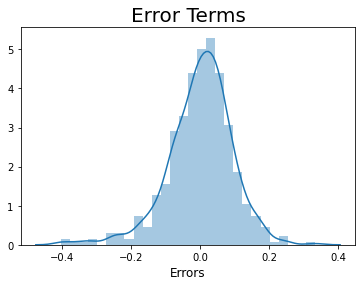

In [523]:
## Plotting the histogram of the error terms
res=y_train-y_train_pred
sns.distplot(res)
plt.title('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=12)
plt.show()

#### Inference: The Error terms are normally distributed with mean zero

## Prediction and Evaluation on test set:

In [524]:
## Rescalling of the test sets too
num_vars=["casual","registered","cnt","temp","atemp","windspeed","hum","day"]

## Fit on data
bike_test[num_vars]=scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
184,0,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0.100000,...,0,0,0,0,0,0,0,0,1,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0.633333,...,0,0,0,0,0,0,1,0,0,1
299,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0.866667,...,0,0,1,0,0,1,0,0,0,1
221,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0.300000,...,0,0,0,0,0,0,0,0,0,1
152,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,0.033333,...,0,0,0,0,0,1,0,0,0,1


In [525]:
bike_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.500609,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.141553,0.123288,0.155251,0.963470
std,0.500722,0.481313,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.285836,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.349389,0.329520,0.362974,0.188034
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.466667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,0.766667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [526]:
# X_test, y_test
y_test=bike_test.pop("cnt")
X_test=bike_test

In [527]:
y_test.shape

(219,)

In [528]:
X_test.shape

(219, 31)

In [529]:
X_test.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,day,Spring,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
184,0,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.100000,0,...,0,0,0,0,0,0,0,0,1,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.633333,0,...,0,0,0,0,0,0,1,0,0,1
299,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.866667,0,...,0,0,1,0,0,1,0,0,0,1
221,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.300000,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.033333,0,...,0,0,0,0,0,1,0,0,0,1


In [530]:
## add a constant to X_test
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,temp,atemp,hum,windspeed,casual,registered,day,...,May,Nov,Octo,Sept,Monday,Saturday,Thursday,Tuesday,Wednesday,No Holiday
184,1.0,0,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.100000,...,0,0,0,0,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.633333,...,0,0,0,0,0,0,1,0,0,1
299,1.0,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.866667,...,0,0,1,0,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.300000,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.033333,...,0,0,0,0,0,1,0,0,0,1


In [531]:
## drop the variables that are dropped from X_train also
X_test_sm=X_test_sm.drop(["registered","casual","day","Thursday","Saturday","Wednesday","Mar","Jun","Dec","Nov","May","Feb","Jul","atemp","Spring","hum","No Holiday","workingday","Monday","Tuesday","Octo","Jan","Aug"],axis=1)
X_test_sm.head()

,const,yr,temp,windspeed,Summer,Winter,Light Rain,Mist,Sept
184,1.0,0,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0.817246,0.537414,1,0,0,0,0


In [532]:
## predictions
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred.head()

184    0.490020
535    0.917009
299    0.403837
221    0.555967
152    0.577841
dtype: float64

In [533]:
## evaluate the model
r2_score(y_test,y_test_pred)


0.7906228342366496

### Inference: The r-squared of our test set is close to the r-squared of the train set. Therefore, our model is good.

In [534]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [535]:
rmse=sqrt(mean_squared_error(y_train,y_train_pred))
rmse

0.0935788150856918

#### Inference: Also, the root mean square error is very less.